# Interview CaseStudy

The attached data is of customers who had taken loan from a Bank. There are independent attributes computed from Bureau and Demographics. 

Dependant variable name: (30_DPD_F3M or BOUNCE_F3M) Build a binary classification model using this bad definition.
Use any binary classification technique you are comfortable with, use any coding language.

There are two files with independent features, join the files using the common key available in data.

1. Publish Univariate statistics for numerical variables

2. Publish distribution for categorical variables

3. Publish how many missing values and special values are there for each of the independent variables

4. Present the model keeping business users in mind.

#### Data Science Life Cycle - CRISP-DM

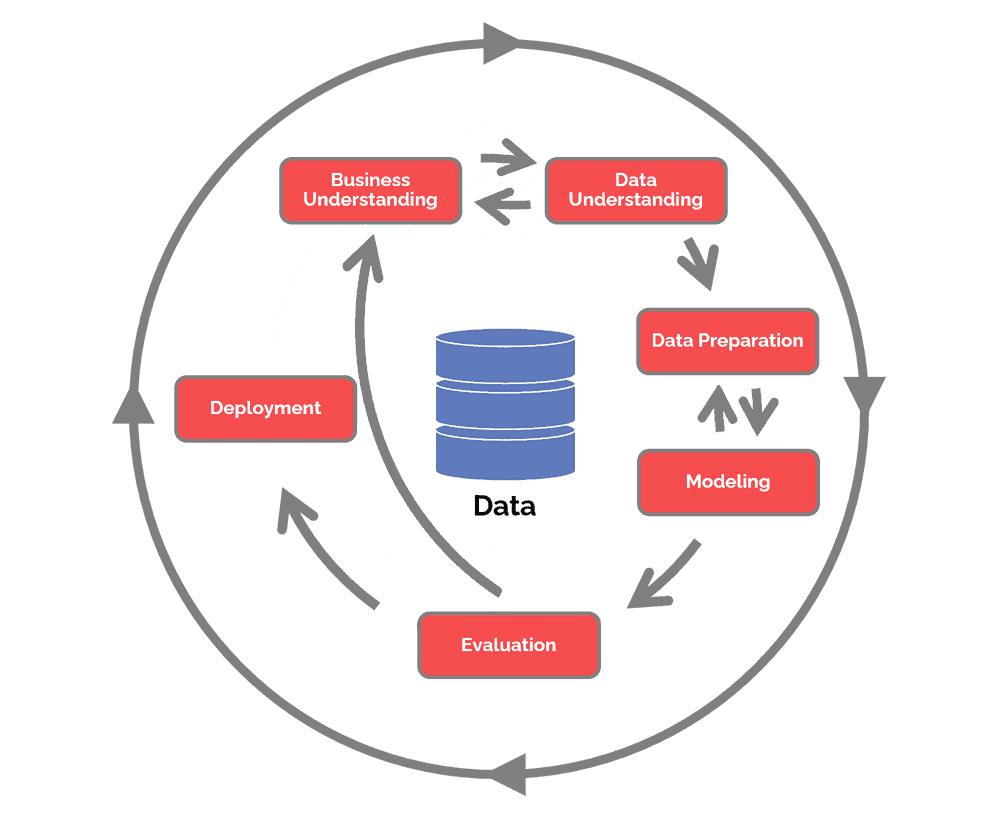

# IMPORT Libraries

In [2]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import seaborn as sns
sns.set_style("whitegrid")
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

In [3]:
#Other Dependent Libraries

from sklearn.preprocessing import MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.preprocessing import LabelEncoder

pd.set_option('display.max_columns', 500)

from sklearn.preprocessing import StandardScaler

from collections import Counter

# GET the Data, Join and preprocessing

In [4]:
df1 = pd.read_csv('case_study1.csv')
df2 = pd.read_csv('case_study2.csv')

In [5]:
df1.duplicated().sum()

0

In [6]:
df2.duplicated().sum()

0

### Summary for Data

The data presented is in two parts, one of which is presented in the cell below:
1. The shape of the data - 51336 rows and 26 columns

2. All the features presented are independent which is analysed in correlation analysis using 'kendall' method.
except for the features which must have the count of data influence on one another e.g. pct_closed_tl, Tot_TL_closed_L12M

3. The data has 40 missing values for oldest tradeline and newest tradeline age.

In [7]:
df1.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72,18
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7,7
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47,2
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5,5
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131,32


In [8]:
df1.shape

(51336, 26)

In [9]:
df1.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL
count,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000,51336.000000
mean,25668.500000,4.858598,2.770415,2.088184,0.736754,0.428919,0.184574,0.089095,0.577542,0.422458,1.503701,0.736851,0.395184,0.149989,0.546751,0.593268,0.124981,1.136084,1.561847,0.070146,0.282511,2.844904,2.013694,1.089762,-32.575639,-62.149525
std,14819.571046,7.177116,5.941680,2.290774,1.296717,0.989972,0.297414,0.205635,0.379867,0.379867,2.119399,1.454120,0.391930,0.257267,1.085529,0.900585,0.505201,2.227997,5.376434,0.340861,0.858168,6.187177,3.198322,2.417496,2791.869609,2790.818622
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-99999.000000,-99999.000000
25%,12834.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000
50%,25668.500000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.556000,0.444000,1.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000
75%,38502.250000,5.000000,3.000000,3.000000,1.000000,1.000000,0.308000,0.053000,1.000000,0.750000,2.000000,1.000000,0.750000,0.250000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000
max,51336.000000,235.000000,216.000000,47.000000,27.000000,19.000000,1.000000,1.000000,1.000000,1.000000,39.000000,39.000000,1.000000,1.000000,34.000000,27.000000,27.000000,41.000000,235.000000,10.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 26 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   PROSPECTID            51336 non-null  int64  
 1   Total_TL              51336 non-null  int64  
 2   Tot_Closed_TL         51336 non-null  int64  
 3   Tot_Active_TL         51336 non-null  int64  
 4   Total_TL_opened_L6M   51336 non-null  int64  
 5   Tot_TL_closed_L6M     51336 non-null  int64  
 6   pct_tl_open_L6M       51336 non-null  float64
 7   pct_tl_closed_L6M     51336 non-null  float64
 8   pct_active_tl         51336 non-null  float64
 9   pct_closed_tl         51336 non-null  float64
 10  Total_TL_opened_L12M  51336 non-null  int64  
 11  Tot_TL_closed_L12M    51336 non-null  int64  
 12  pct_tl_open_L12M      51336 non-null  float64
 13  pct_tl_closed_L12M    51336 non-null  float64
 14  Tot_Missed_Pmnt       51336 non-null  int64  
 15  Auto_TL            

# Missing Value check

In [11]:
df1.replace(-99999.0,np.nan).isna().sum()

PROSPECTID               0
Total_TL                 0
Tot_Closed_TL            0
Tot_Active_TL            0
Total_TL_opened_L6M      0
Tot_TL_closed_L6M        0
pct_tl_open_L6M          0
pct_tl_closed_L6M        0
pct_active_tl            0
pct_closed_tl            0
Total_TL_opened_L12M     0
Tot_TL_closed_L12M       0
pct_tl_open_L12M         0
pct_tl_closed_L12M       0
Tot_Missed_Pmnt          0
Auto_TL                  0
CC_TL                    0
Consumer_TL              0
Gold_TL                  0
Home_TL                  0
PL_TL                    0
Secured_TL               0
Unsecured_TL             0
Other_TL                 0
Age_Oldest_TL           40
Age_Newest_TL           40
dtype: int64

## Kendall Method to identify dependence between features

<AxesSubplot:>

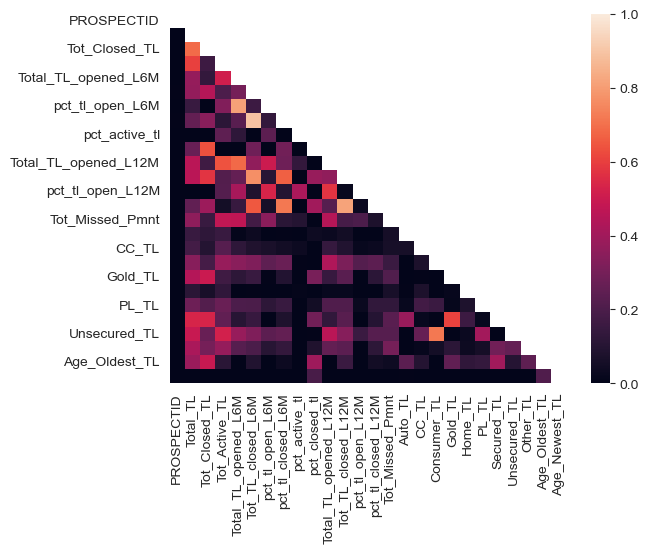

In [12]:
sns.heatmap(df1.corr(method='kendall'), vmin=0, vmax=1, mask=np.triu(np.ones_like(df1.corr())))

#### DATA removed from rows in order to save data from bias

In [13]:
df1.replace(-99999.0,np.nan, inplace=True)
df1.dropna(how='any', axis=0, inplace=True)

In [14]:
df1.shape

(51296, 26)

<AxesSubplot:>

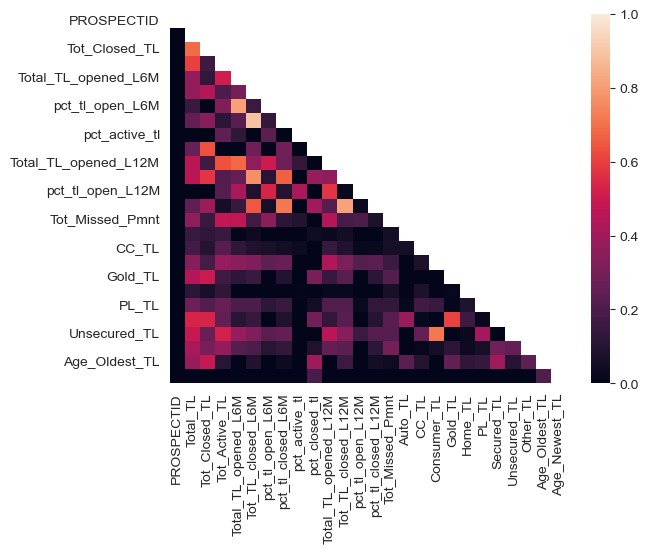

In [15]:
sns.heatmap(df1.corr(method='kendall'), vmin=0, vmax=1, mask=np.triu(np.ones_like(df1.corr())))

 ### Summary for Data

The data presented now is the second part presented in the cell below:
1. The shape of the data - 51336 rows and 63 columns

2. All the features presented are not independent as per correlation check using 'kendall' method.
features we see have the influence in other features because of their inherent nature of record.
Say for example, time_since_first_deliquency, max_recent_level_of_deliq
and tot_enq with CC_enq_L12m,PL_enq_L6m etc have relations which make sense as a customer who is applying for a loan can enquire with application through any instrument available to them.

3. The data is sparse and is evident from the amount of missing values below, a total of 19 features have significant missing values over 12% :

feature	// Count of Missing Values

time_since_recent_payment // 	4291

time_since_first_deliquency	// 35949

time_since_recent_deliquency	// 35949

max_delinquency_level	// 35949

max_deliq_6mts	// 12890

max_deliq_12mts	// 10832

tot_enq	// 6321

CC_enq	// 6321

CC_enq_L6m	// 6321

CC_enq_L12m	// 6321

PL_enq	// 6321

PL_enq_L6m	// 6321

PL_enq_L12m	// 6321

time_since_recent_enq	// 6321

enq_L12m	// 6321

enq_L6m	// 6321

enq_L3m	// 6321

pct_currentBal_all_TL	// 72

CC_utilization	// 47636

PL_utilization	// 44435

max_unsec_exposure_inPct	// 23178

In [16]:
df2.shape

(51336, 63)

In [17]:
df2.head()

,PROSPECTID,time_since_recent_payment,time_since_first_deliquency,time_since_recent_deliquency,num_times_delinquent,max_delinquency_level,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,max_deliq_6mts,max_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,tot_enq,CC_enq,CC_enq_L6m,CC_enq_L12m,PL_enq,PL_enq_L6m,PL_enq_L12m,time_since_recent_enq,enq_L12m,enq_L6m,enq_L3m,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_currentBal_all_TL,CC_utilization,CC_Flag,PL_utilization,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,max_unsec_exposure_inPct,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M
0,1,549,35,15,11,29,29,0,0,0,-99999,-99999,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,6,0,0,0,6,0,0,566,0,0,0,Married,12TH,48,M,51000,114,0.200,0.0,0.798,-99999.0,0,0.798,1,0.0,0.0,0.0,0.0,13.333,1,0,PL,PL,Yes,0,1
1,2,47,-99999,-99999,0,-99999,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,209,1,0,0,Single,GRADUATE,23,F,19000,50,1.000,0.0,0.370,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,0.860,0,0,ConsumerLoan,ConsumerLoan,No,0,0
2,3,302,11,3,9,25,25,1,9,8,25,25,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,4,0,0,0,0,0,0,587,0,0,0,Married,SSC,40,M,18,191,1.000,0.5,0.585,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,5741.667,1,0,ConsumerLoan,others,Yes,0,0
3,4,-99999,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,-99999,Married,SSC,34,M,10000,246,1.000,1.0,0.990,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,9.900,0,0,others,others,No,0,1
4,5,583,-99999,-99999,0,-99999,0,0,0,0,-99999,-99999,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,3951,0,0,0,Married,POST-GRADUATE,48,M,15000,75,0.333,0.0,0.000,-99999.0,0,-99999.000,0,0.0,0.0,0.0,0.0,-99999.000,0,0,AL,AL,No,0,1


In [18]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51336 entries, 0 to 51335
Data columns (total 63 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   PROSPECTID                    51336 non-null  int64  
 1   time_since_recent_payment     51336 non-null  int64  
 2   time_since_first_deliquency   51336 non-null  int64  
 3   time_since_recent_deliquency  51336 non-null  int64  
 4   num_times_delinquent          51336 non-null  int64  
 5   max_delinquency_level         51336 non-null  int64  
 6   max_recent_level_of_deliq     51336 non-null  int64  
 7   num_deliq_6mts                51336 non-null  int64  
 8   num_deliq_12mts               51336 non-null  int64  
 9   num_deliq_6_12mts             51336 non-null  int64  
 10  max_deliq_6mts                51336 non-null  int64  
 11  max_deliq_12mts               51336 non-null  int64  
 12  num_times_30p_dpd             51336 non-null  int64  
 13  n

<AxesSubplot:>

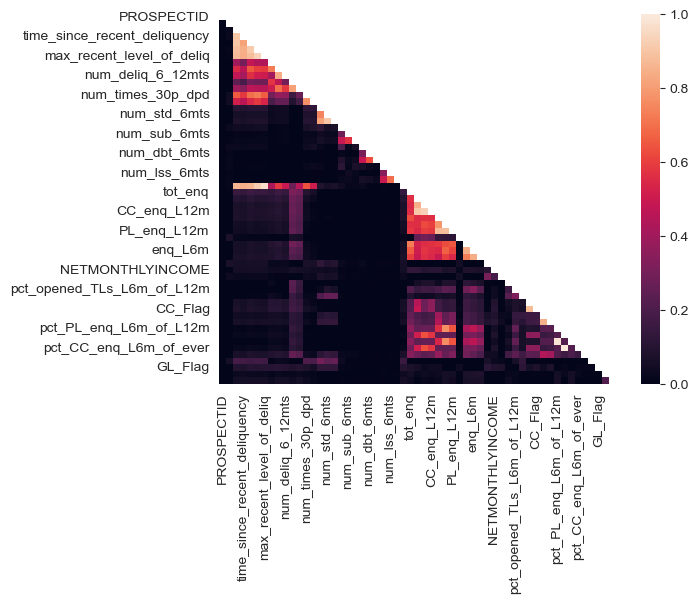

In [19]:
sns.heatmap(df2.corr(method='kendall'), vmin=0, vmax=1, mask=np.triu(np.ones_like(df2.corr())))

All the enquiries related features are correlated. Ofcourse, they are related as one must be used to record details in other.

# Missing Value check

In [20]:
pd.set_option('display.max_rows', 500)

In [21]:
df2.replace(-99999.0,np.nan).isna().sum()

PROSPECTID                          0
time_since_recent_payment        4291
time_since_first_deliquency     35949
time_since_recent_deliquency    35949
num_times_delinquent                0
max_delinquency_level           35949
max_recent_level_of_deliq           0
num_deliq_6mts                      0
num_deliq_12mts                     0
num_deliq_6_12mts                   0
max_deliq_6mts                  12890
max_deliq_12mts                 10832
num_times_30p_dpd                   0
num_times_60p_dpd                   0
num_std                             0
num_std_6mts                        0
num_std_12mts                       0
num_sub                             0
num_sub_6mts                        0
num_sub_12mts                       0
num_dbt                             0
num_dbt_6mts                        0
num_dbt_12mts                       0
num_lss                             0
num_lss_6mts                        0
num_lss_12mts                       0
recent_level

### DATA Cleaning:

A decision has to be made between :
1. To avoid Biased data remove the absent data sample

2. Impute data to avoid data loss from other existent features

In [22]:
## Removing inconsistent features completely without any statistical or synthetic imputation
df2.replace(-99999.0,np.nan, inplace=True)
df2.dropna(how ='any' , axis=1, inplace=True)

In [23]:
df2.shape

(51336, 42)

<AxesSubplot:>

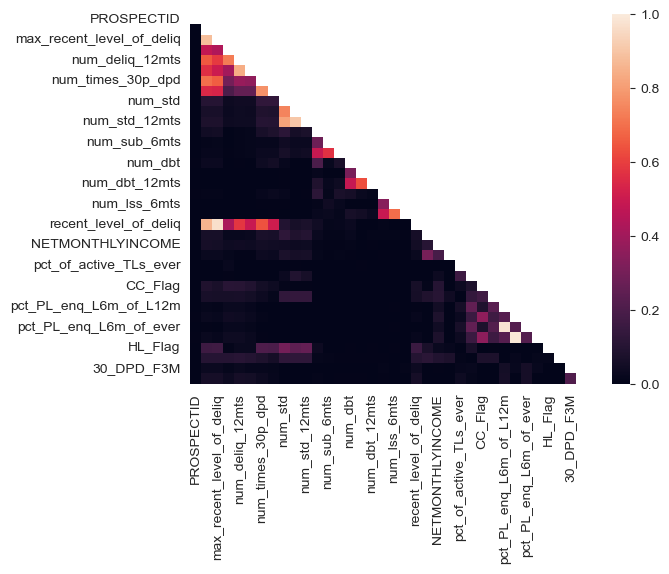

In [24]:
sns.heatmap(df2.corr(method='kendall'), vmin=0, vmax=1, mask=np.triu(np.ones_like(df2.corr())))

## Univariate distribution of data correlated above.

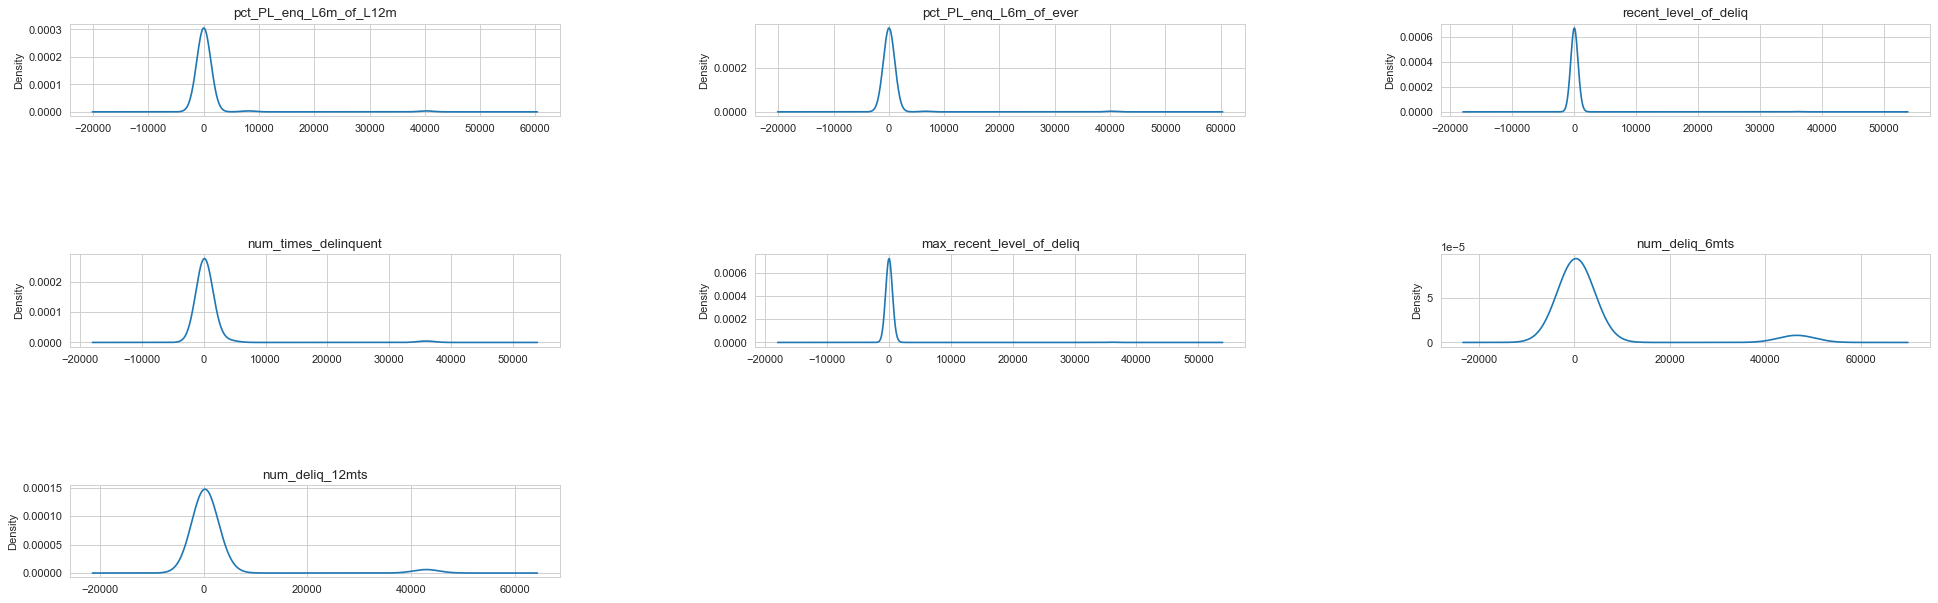

In [25]:
corlist = ['pct_PL_enq_L6m_of_L12m', 'pct_PL_enq_L6m_of_ever', 'recent_level_of_deliq', 'num_times_delinquent', 
           'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts']
k = 0
plt.figure(figsize=(30,10),dpi=80)
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
for _ in corlist:
    k = k + 1
    plt.subplot(4, 3, k)
    df2[_].value_counts().plot(kind='kde', bw_method=0.3)
    plt.title(_)
plt.show()

Long tailed graphs could only mean that random values occur in the feature with huge variance from head. 

In [26]:
df2.columns

Index(['PROSPECTID', 'num_times_delinquent', 'max_recent_level_of_deliq',
       'num_deliq_6mts', 'num_deliq_12mts', 'num_deliq_6_12mts',
       'num_times_30p_dpd', 'num_times_60p_dpd', 'num_std', 'num_std_6mts',
       'num_std_12mts', 'num_sub', 'num_sub_6mts', 'num_sub_12mts', 'num_dbt',
       'num_dbt_6mts', 'num_dbt_12mts', 'num_lss', 'num_lss_6mts',
       'num_lss_12mts', 'recent_level_of_deliq', 'MARITALSTATUS', 'EDUCATION',
       'AGE', 'GENDER', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr',
       'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'CC_Flag',
       'PL_Flag', 'pct_PL_enq_L6m_of_L12m', 'pct_CC_enq_L6m_of_L12m',
       'pct_PL_enq_L6m_of_ever', 'pct_CC_enq_L6m_of_ever', 'HL_Flag',
       'GL_Flag', 'last_prod_enq2', 'first_prod_enq2', 'delinquent_flag',
       '30_DPD_F3M', 'BOUNCE_F3M'],
      dtype='object')

# Merging two clean datasets into one dataframe

In [27]:
df = df1.merge(df2, on='PROSPECTID', how='inner')

In [28]:
#Converting categorical feature in object to numerical with pandas get_dummies function
df["Single"] = pd.get_dummies(df['MARITALSTATUS'],drop_first=True) #Marital status has two classes

#EDUCATION has 7 classes ['12TH', 'GRADUATE', 'SSC', 'POST_GRADUATE', 'UNDER GRADUATE',
#        'OTHERS', 'PROFESSIONAL'] which we need to encode in numeric labels and convert in as categorical data.
df["EDUCATION"] = df['EDUCATION'].replace([" ","POST-GRADUATE"],["_","POST_GRADUATE"])

#For EDUCATION field, label encoding is important.
le = LabelEncoder()
le = le.fit(df["EDUCATION"])
df["EDUCATION"] = le.fit_transform(df.EDUCATION)
df['delinquent_flag_yes'] = pd.get_dummies(df['delinquent_flag'],drop_first=True)

In [29]:
for _ in ['last_prod_enq2','first_prod_enq2']:
    print(_, df[_].unique())

last_prod_enq2 ['PL' 'ConsumerLoan' 'others' 'AL' 'CC' 'HL']
first_prod_enq2 ['PL' 'ConsumerLoan' 'others' 'AL' 'HL' 'CC']


In [30]:
#For other two fields, label encoding should help.
le2 = LabelEncoder()
le2 = le2.fit(df['last_prod_enq2'])
df['last_prod_enq2'] = le2.transform(df.last_prod_enq2)
le3 = LabelEncoder()
le3 = le3.fit(df['first_prod_enq2'])
df['first_prod_enq2'] = le3.transform(df.first_prod_enq2)

In [31]:
for i in ['last_prod_enq2','first_prod_enq2']:
    print(i, df[i].unique())

last_prod_enq2 [4 2 5 0 1 3]
first_prod_enq2 [4 2 5 0 3 1]


# Check the info(), describe() methods on the dataset to get a glimpse

In [32]:
#Data for analysis only has 51296 samples as first part of the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51296 entries, 0 to 51295
Data columns (total 69 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   PROSPECTID                  51296 non-null  int64  
 1   Total_TL                    51296 non-null  int64  
 2   Tot_Closed_TL               51296 non-null  int64  
 3   Tot_Active_TL               51296 non-null  int64  
 4   Total_TL_opened_L6M         51296 non-null  int64  
 5   Tot_TL_closed_L6M           51296 non-null  int64  
 6   pct_tl_open_L6M             51296 non-null  float64
 7   pct_tl_closed_L6M           51296 non-null  float64
 8   pct_active_tl               51296 non-null  float64
 9   pct_closed_tl               51296 non-null  float64
 10  Total_TL_opened_L12M        51296 non-null  int64  
 11  Tot_TL_closed_L12M          51296 non-null  int64  
 12  pct_tl_open_L12M            51296 non-null  float64
 13  pct_tl_closed_L12M          512

In [33]:
df.describe()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,EDUCATION,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,30_DPD_F3M,BOUNCE_F3M,Single,delinquent_flag_yes
count,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,5.129600e+04,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.00000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000
mean,25668.574353,4.861471,2.772321,2.089149,0.737328,0.429254,0.184718,0.089164,0.577349,0.422651,1.504874,0.737426,0.395492,0.150106,0.546748,0.593711,0.125078,1.136970,1.563046,0.070181,0.282712,2.846752,2.014718,1.089773,45.376969,15.780022,1.574977,13.532498,0.185122,0.480427,0.295306,0.729453,0.427304,9.211849,1.485184,3.322033,0.062695,0.002437,0.009299,0.025967,0.001209,0.004133,0.015108,0.000975,0.002846,11.274875,2.135976,33.759728,2.642537e+04,110.714617,0.577349,0.303191,0.089539,0.167986,0.190455,0.065203,0.170518,0.05632,0.271308,0.052909,3.440190,3.706527,0.034642,0.242456,0.264582,0.299965
std,14819.611579,7.179141,5.943536,2.291375,1.297059,0.990286,0.297486,0.205700,0.379804,0.379804,2.119809,1.454542,0.391927,0.257334,1.085863,0.900786,0.505386,2.228639,5.378357,0.340963,0.858461,6.189165,3.199333,2.418314,41.737151,21.995676,4.166403,53.356431,0.710498,1.522745,1.027839,2.763122,2.102190,21.315637,3.365637,7.520773,0.801529,0.091419,0.233494,0.635859,0.070358,0.179955,0.529936,0.075443,0.185422,46.117206,2.199356,8.816649,2.003178e+04,76.042109,0.379804,0.406119,0.285523,0.373857,0.376245,0.235748,0.350220,0.21354,0.444639,0.223853,1.542083,1.640695,0.182873,0.428573,0.441115,0.458247
min,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12836.750000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [34]:
df.head()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M,Single,delinquent_flag_yes
0,1,5,4,1,0,0,0.000,0.0,0.200,0.800,0,0,0.00,0.0,0,0,0,0,1,0,4,1,4,0,72.0,18.0,11,29,0,0,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,Married,0,48,M,51000,114,0.200,0.0,0,1,0.0,0.0,0.0,0.0,1,0,4,4,Yes,0,1,0,1
1,2,1,0,1,0,0,0.000,0.0,1.000,0.000,1,0,1.00,0.0,0,0,0,1,0,0,0,0,1,0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Single,1,23,F,19000,50,1.000,0.0,0,0,0.0,0.0,0.0,0.0,0,0,2,2,No,0,0,1,0
2,3,8,0,8,1,0,0.125,0.0,1.000,0.000,2,0,0.25,0.0,1,1,0,6,1,0,0,2,6,0,47.0,2.0,9,25,1,9,8,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,Married,5,40,M,18,191,1.000,0.5,0,0,0.0,0.0,0.0,0.0,1,0,2,5,Yes,0,0,0,1
3,4,1,0,1,1,0,1.000,0.0,1.000,0.000,1,0,1.00,0.0,1,0,0,0,0,0,0,0,1,1,5.0,5.0,0,0,0,0,0,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,Married,5,34,M,10000,246,1.000,1.0,0,0,0.0,0.0,0.0,0.0,0,0,5,5,No,0,1,0,0
4,5,3,2,1,0,0,0.000,0.0,0.333,0.667,0,0,0.00,0.0,0,1,0,0,0,0,0,3,0,2,131.0,32.0,0,0,0,0,0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,Married,3,48,M,15000,75,0.333,0.0,0,0,0.0,0.0,0.0,0.0,0,0,0,0,No,0,1,0,0


In [35]:
df.tail()

,PROSPECTID,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,MARITALSTATUS,EDUCATION,AGE,GENDER,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,delinquent_flag,30_DPD_F3M,BOUNCE_F3M,Single,delinquent_flag_yes
51291,51332,3,0,3,1,0,0.333,0.00,1.0,0.0,1,0,0.333,0.00,0,0,0,2,0,0,0,0,3,1,24.0,5.0,2,24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,24,Married,0,43,M,18500,249,1.0,1.0,0,0,0.0,0.0,0.0,0.0,0,0,2,2,Yes,1,1,0,1
51292,51333,4,2,2,0,1,0.000,0.25,0.5,0.5,2,1,0.500,0.25,0,2,0,2,0,0,0,2,2,0,74.0,7.0,0,0,0,0,0,0,0,6,4,6,0,0,0,0,0,0,0,0,0,0,Married,5,31,M,25000,186,0.5,0.0,0,0,0.0,0.0,0.0,0.0,0,0,5,5,No,0,0,0,0
51293,51334,2,1,1,1,1,0.500,0.50,0.5,0.5,2,1,1.000,0.50,0,0,0,2,0,0,0,0,2,0,9.0,5.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Married,5,28,M,18000,66,0.5,0.5,0,0,1.0,0.0,1.0,0.0,0,0,2,5,No,0,0,0,0
51294,51335,2,1,1,0,0,0.000,0.00,0.5,0.5,1,1,0.500,0.50,0,0,0,2,0,0,0,0,2,0,15.0,8.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,Single,6,25,F,12802,54,0.5,0.0,0,0,0.0,0.0,0.0,0.0,0,0,2,5,No,0,0,1,0
51295,51336,1,0,1,0,0,0.000,0.00,1.0,0.0,0,0,0.000,0.00,0,1,0,0,0,0,0,1,0,0,20.0,20.0,0,0,0,0,0,0,0,18,4,10,0,0,0,0,0,0,0,0,0,0,Married,5,25,M,16000,102,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,5,5,No,0,0,0,0


### For the ethical reasons, deleting the GENDER feature
and the rest of redundant features

In [36]:
#Ethical removal for GENDER field and generic ID field and those for which categorical field are created.
df.drop(columns=['PROSPECTID','GENDER','MARITALSTATUS','delinquent_flag'], inplace=True, axis=1)
print("Dropped columns : 'PROSPECTID','GENDER','MARITALSTATUS','delinquent_flag'")
df.head(2)

Dropped columns : 'PROSPECTID','GENDER','MARITALSTATUS','delinquent_flag'


,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,EDUCATION,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,30_DPD_F3M,BOUNCE_F3M,Single,delinquent_flag_yes
0,5,4,1,0,0,0.0,0.0,0.2,0.8,0,0,0.0,0.0,0,0,0,0,1,0,4,1,4,0,72.0,18.0,11,29,0,0,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,0,48,51000,114,0.2,0.0,0,1,0.0,0.0,0.0,0.0,1,0,4,4,0,1,0,1
1,1,0,1,0,0,0.0,0.0,1.0,0.0,1,0,1.0,0.0,0,0,0,1,0,0,0,0,1,0,7.0,7.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,23,19000,50,1.0,0.0,0,0,0.0,0.0,0.0,0.0,0,0,2,2,0,0,1,0


The dataset described above shows gap in the feature vector values.

# Exploratory Data Analysis

### Categorical Variable Distribution

In [37]:
feat = df.columns
list_category = []
print("The type of feature : \n")
for x in feat:
    if df[x].nunique() < 20:
        print(x,"is categorical")
        list_category.append(x)
        
print("\nThe list of categorical features with Unique Values less than 20 are stored in list_category\n")
print("Number of categories in dataset :", len(list_category))

The type of feature : 

Tot_TL_closed_L6M is categorical
Auto_TL is categorical
CC_TL is categorical
Home_TL is categorical
num_deliq_6mts is categorical
num_deliq_6_12mts is categorical
num_sub_6mts is categorical
num_sub_12mts is categorical
num_dbt_6mts is categorical
num_dbt_12mts is categorical
num_lss_6mts is categorical
num_lss_12mts is categorical
EDUCATION is categorical
CC_Flag is categorical
PL_Flag is categorical
HL_Flag is categorical
GL_Flag is categorical
last_prod_enq2 is categorical
first_prod_enq2 is categorical
30_DPD_F3M is categorical
BOUNCE_F3M is categorical
Single is categorical
delinquent_flag_yes is categorical

The list of categorical features with Unique Values less than 20 are stored in list_category

Number of categories in dataset : 23


Get the bar plot for distribution for categorical data

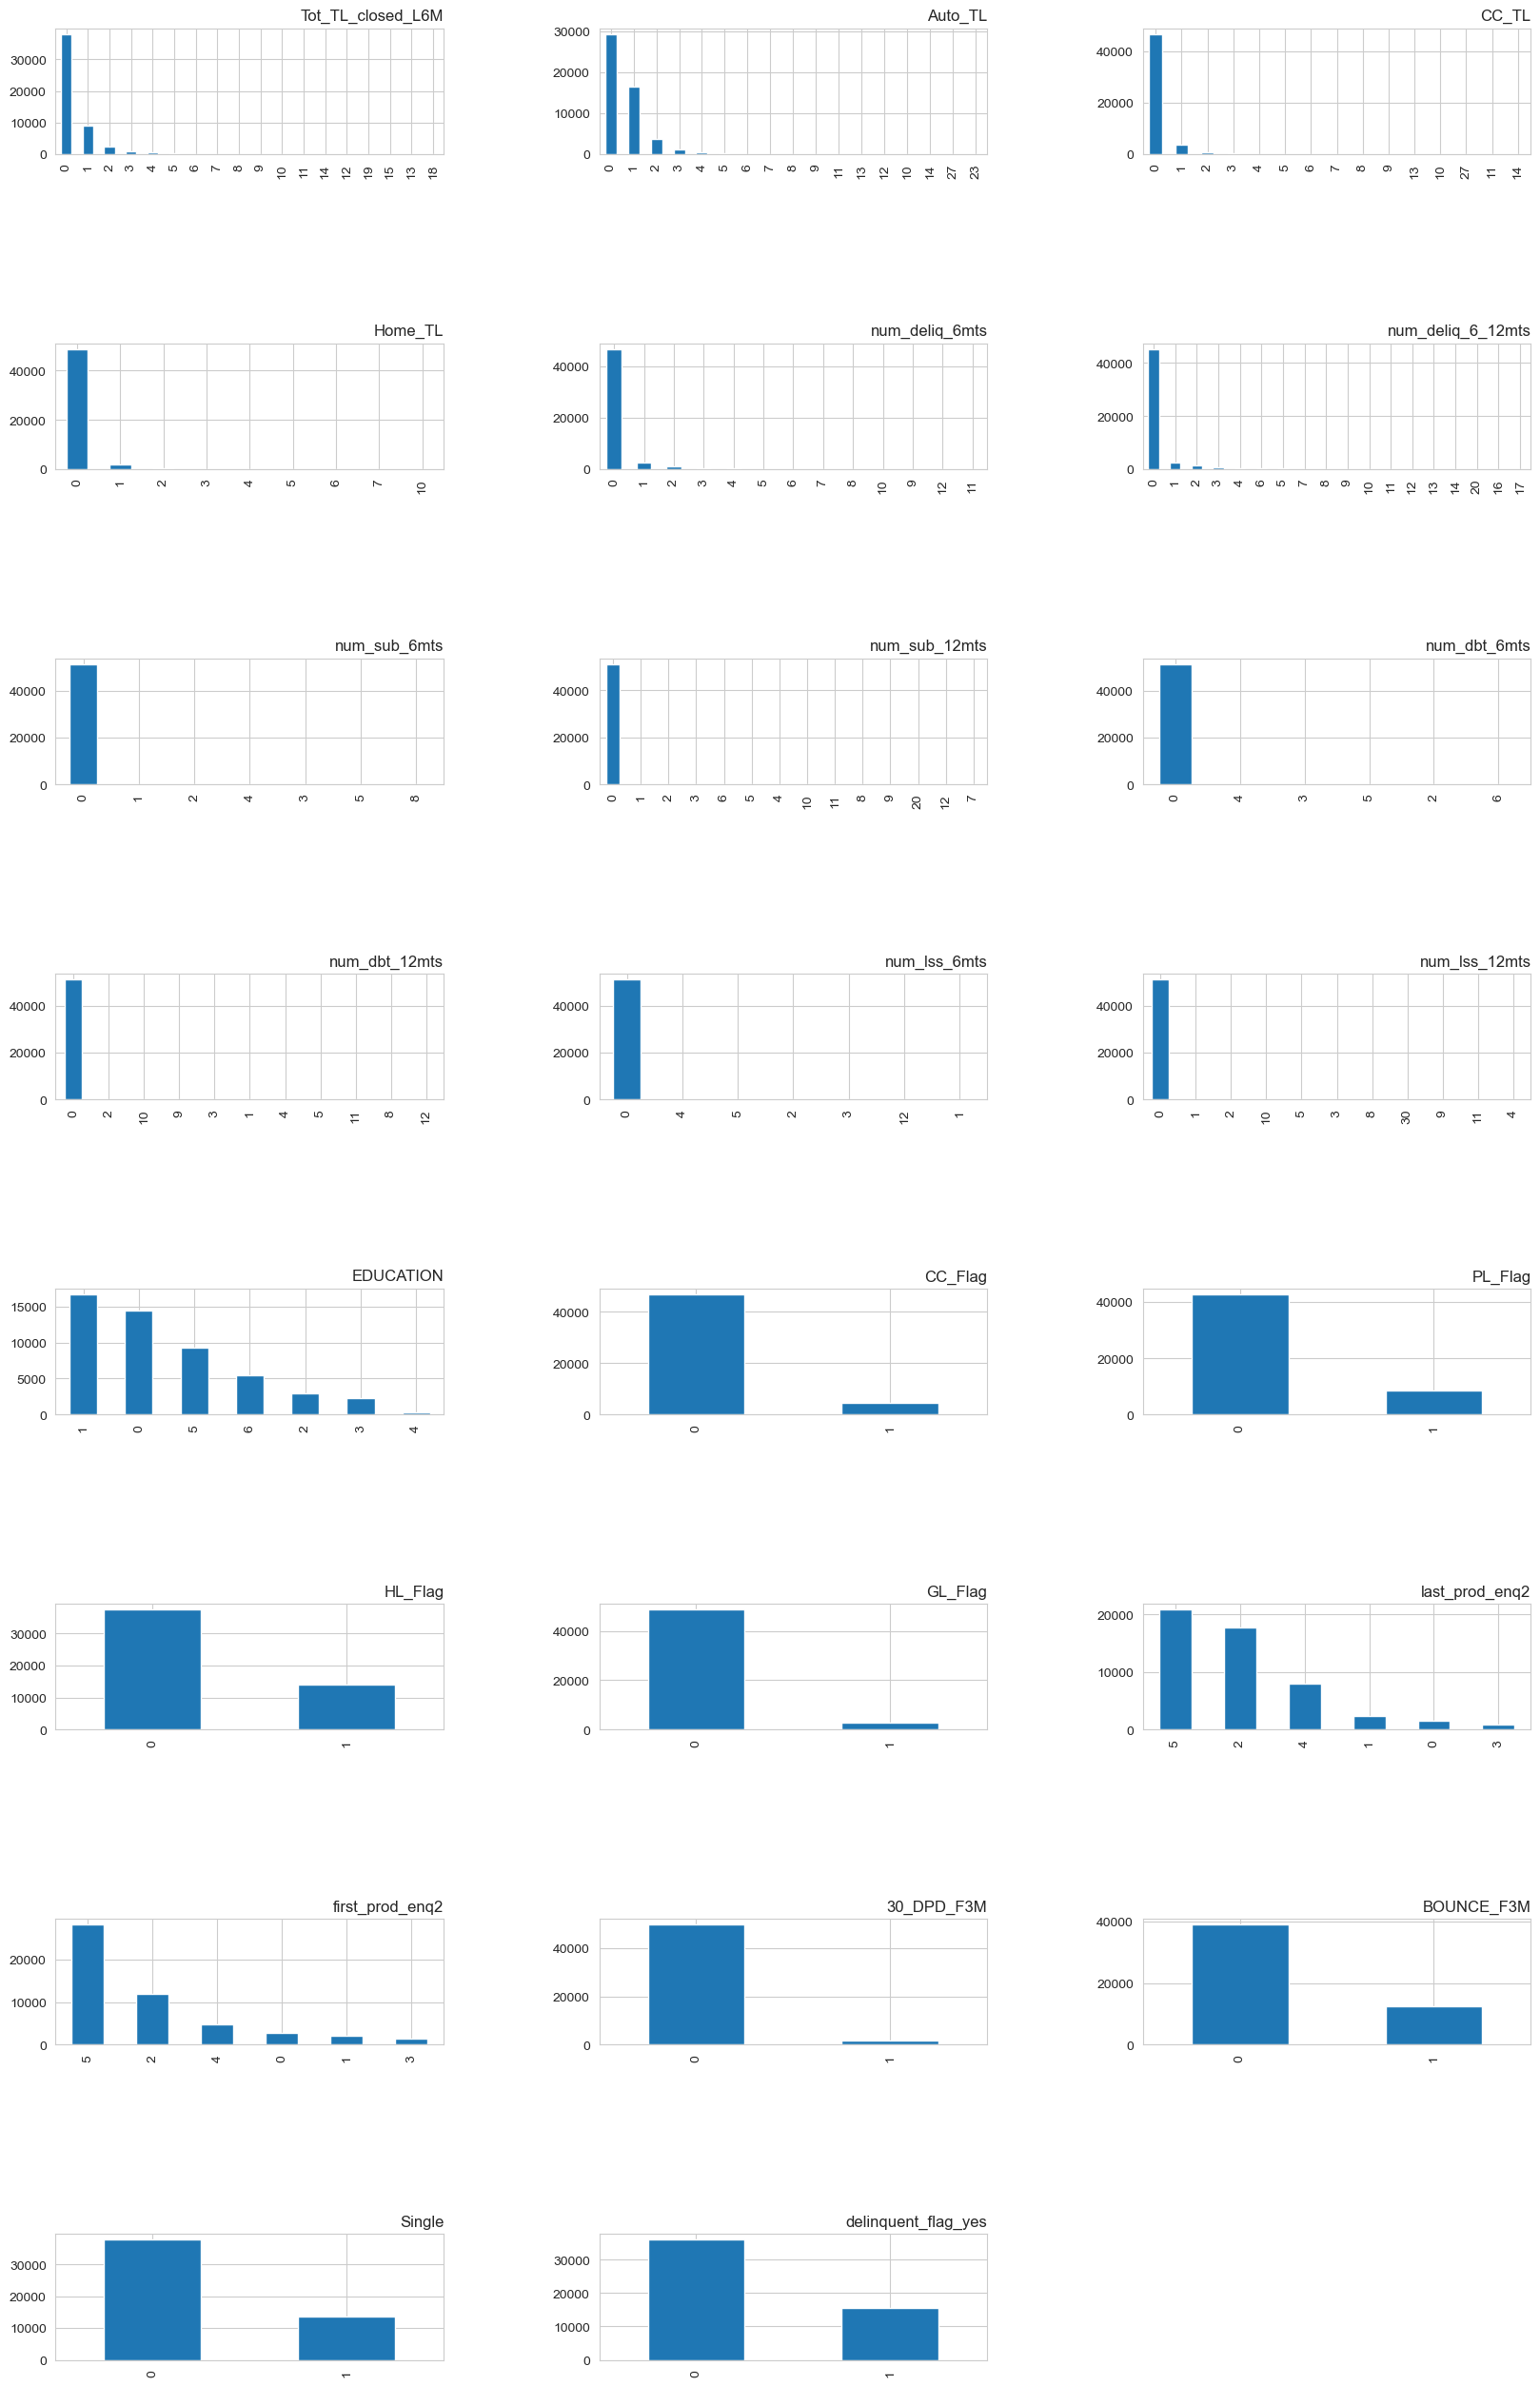

In [41]:
try:
    k=0
    plt.figure(figsize=(20,25))
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for col in list_category:    
        k=k+1
        plt.subplot(8, 3,k)    
        df[col].value_counts().plot(kind='bar');
        plt.title(col,loc='right')
except Exception as e:
    print(e)

In [42]:
# df['Single'] has two categories : 0 and 1
counter_singl = Counter(df['Single'])
print("Counter for Singles (Marital status) as Yes :1 or No : 0 ",counter_singl)

Counter for Singles (Marital status) as Yes :1 or No : 0  Counter({0: 37724, 1: 13572})


There is a serious class imbalance for Marital status, delinquent_flag and other flags customer sample from total trade lines.

In [43]:
education = df['EDUCATION'].value_counts()

education_label = list(le.inverse_transform(df.EDUCATION.unique()))

edu = list(zip(education_label,education))

In [44]:
cntr0 = Counter(df['EDUCATION'])
print("Counter for education level in customers \n", cntr0)
print("where key-pair values are : \n",edu)

Counter for education level in customers 
 Counter({1: 16655, 0: 14458, 5: 9268, 6: 5491, 2: 2915, 3: 2240, 4: 269})
where key-pair values are : 
 [('12TH', 16655), ('GRADUATE', 14458), ('SSC', 9268), ('POST_GRADUATE', 5491), ('UNDER GRADUATE', 2915), ('OTHERS', 2240), ('PROFESSIONAL', 269)]


<AxesSubplot:ylabel='Density'>

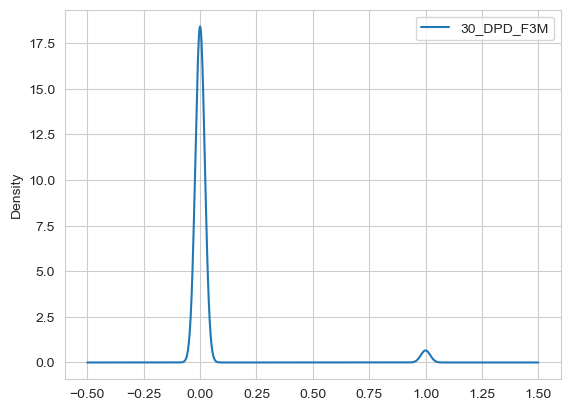

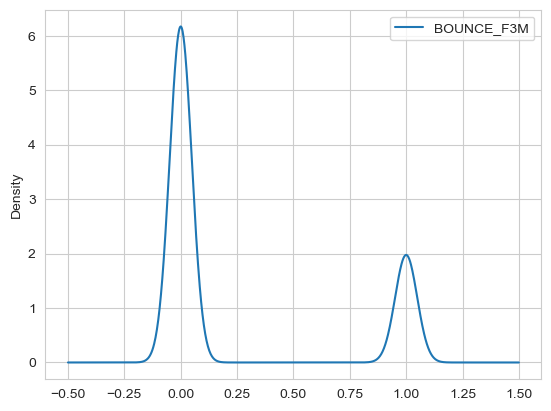

In [45]:
df.plot(x='Tot_TL_closed_L6M',y='30_DPD_F3M',kind='kde')

df.plot(x='Tot_TL_closed_L6M',y='BOUNCE_F3M',kind='kde')

<AxesSubplot:ylabel='Frequency'>

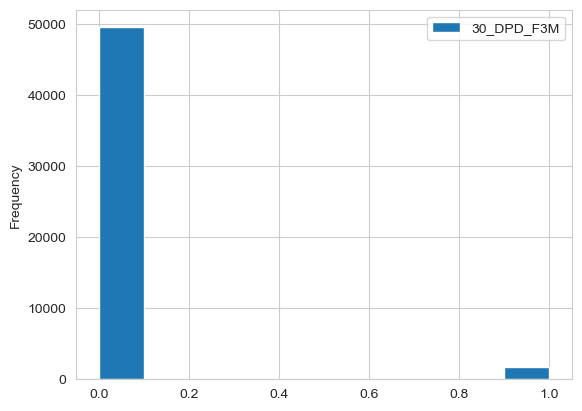

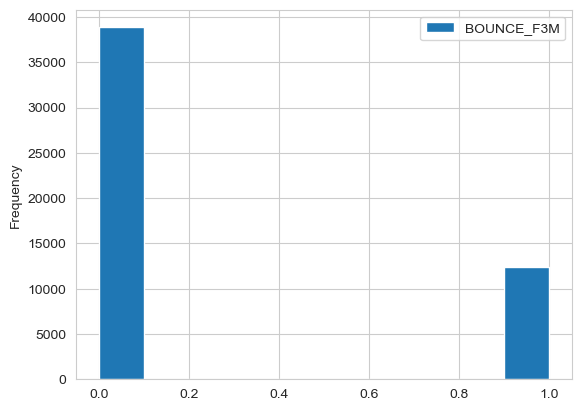

In [46]:
df.plot(x='Auto_TL', y='30_DPD_F3M', kind='hist')
df.plot(x='Auto_TL', y='BOUNCE_F3M', kind='hist')

In [47]:
for i in list_category:
    print("Number of Unique labels in",i," are ",df[i].unique(),"\n")

Number of Unique labels in Tot_TL_closed_L6M  are  [ 0  1  2  4  5  3 12  7  8  9 10  6 11 15 14 13 19 18] 

Number of Unique labels in Auto_TL  are  [ 0  1  4  2  3  8  5  7 13 12  6  9 11 14 10 27 23] 

Number of Unique labels in CC_TL  are  [ 0  1  2  7  3  4  5  6  9 10 27  8 13 11 14] 

Number of Unique labels in Home_TL  are  [ 0  1  2  3  4 10  5  6  7] 

Number of Unique labels in num_deliq_6mts  are  [ 0  1  2  4  3  5  6  9  7  8 10 11 12] 

Number of Unique labels in num_deliq_6_12mts  are  [ 0  8  1  2  3  6  5  4  7  9 10 11 12 13 14 20 16 17] 

Number of Unique labels in num_sub_6mts  are  [0 1 3 5 2 8 4] 

Number of Unique labels in num_sub_12mts  are  [ 0  1  2  9  6  3  5  4 10 11 20  8 12  7] 

Number of Unique labels in num_dbt_6mts  are  [0 4 5 2 3 6] 

Number of Unique labels in num_dbt_12mts  are  [ 0  4 10  3  2 11  9  8  5  1 12] 

Number of Unique labels in num_lss_6mts  are  [ 0  4  3  5 12  2  1] 

Number of Unique labels in num_lss_12mts  are  [ 0  5 10  3  

## H0 --> There is no direct relationship between features and all are independent

## H1 --> The relationship is evident if p-value is higher than level of significance

Using chi^2 analysis in the categorical data in dataset - df, we are going to establish the basis of independence or dependence between features given.

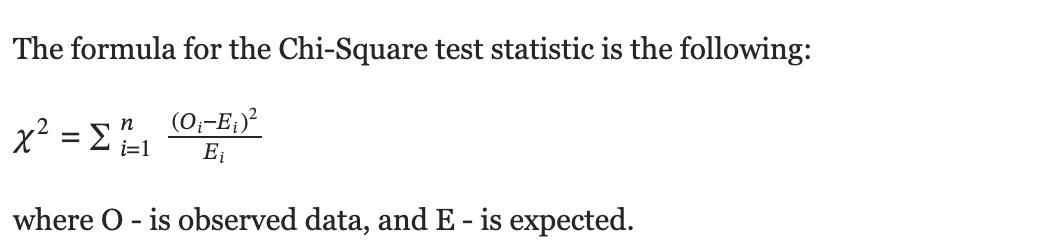

In [48]:
from scipy.stats import chi2

from scipy.stats import chi2_contingency

from scipy.stats import chisquare

In [49]:
for x in list_category:
    df[x] = df[x].astype('category')

In [50]:
df_cat = df.select_dtypes('category')

In [51]:
zero_rows = df_cat[df_cat[df_cat.columns].eq(0).all(1)].index

In [52]:
# df_cat = df_cat.dropna(inplace=True)

In [53]:
df_cat = df_cat.drop(index= zero_rows, axis=0)

In [54]:
stats, p, dof, expected = chi2_contingency(df_cat)

expect_list = pd.DataFrame(expected, columns=df_cat.columns)

expect_list

,Tot_TL_closed_L6M,Auto_TL,CC_TL,Home_TL,num_deliq_6mts,num_deliq_6_12mts,num_sub_6mts,num_sub_12mts,num_dbt_6mts,num_dbt_12mts,num_lss_6mts,num_lss_12mts,EDUCATION,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,30_DPD_F3M,BOUNCE_F3M,Single,delinquent_flag_yes
0,0.414550,0.573374,0.120794,0.067777,0.178780,0.285190,0.002353,0.008980,0.001167,0.003991,0.000941,0.002749,2.062810,0.086472,0.162232,0.262014,0.051096,3.322350,3.579563,0.033455,0.234150,0.255519,0.289690
1,0.207275,0.286687,0.060397,0.033888,0.089390,0.142595,0.001177,0.004490,0.000584,0.001996,0.000471,0.001374,1.031405,0.043236,0.081116,0.131007,0.025548,1.661175,1.789782,0.016728,0.117075,0.127760,0.144845
2,0.829100,1.146748,0.241587,0.135554,0.357561,0.570381,0.004707,0.017961,0.002335,0.007983,0.001883,0.005497,4.125620,0.172944,0.324463,0.524029,0.102193,6.644700,7.159127,0.066911,0.468301,0.511038,0.579380
3,0.552733,0.764499,0.161058,0.090369,0.238374,0.380254,0.003138,0.011974,0.001556,0.005322,0.001255,0.003665,2.750413,0.115296,0.216309,0.349352,0.068128,4.429800,4.772751,0.044607,0.312201,0.340692,0.386253
4,0.172729,0.238906,0.050331,0.028240,0.074492,0.118829,0.000981,0.003742,0.000486,0.001663,0.000392,0.001145,0.859504,0.036030,0.067597,0.109173,0.021290,1.384312,1.491485,0.013940,0.097563,0.106466,0.120704
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51268,0.241821,0.334468,0.070463,0.039537,0.104289,0.166361,0.001373,0.005239,0.000681,0.002328,0.000549,0.001603,1.203306,0.050442,0.094635,0.152842,0.029806,1.938037,2.088079,0.019516,0.136588,0.149053,0.168986
51269,0.621825,0.860061,0.181190,0.101665,0.268171,0.427785,0.003530,0.013471,0.001751,0.005987,0.001412,0.004123,3.094215,0.129708,0.243347,0.393021,0.076644,4.983525,5.369345,0.050183,0.351226,0.383279,0.434535
51270,0.449096,0.621155,0.130860,0.073425,0.193679,0.308956,0.002549,0.009729,0.001265,0.004324,0.001020,0.002978,2.234711,0.093678,0.175751,0.283849,0.055354,3.599212,3.877860,0.036243,0.253663,0.276812,0.313831
51271,0.483642,0.668936,0.140926,0.079073,0.208577,0.332722,0.002746,0.010477,0.001362,0.004657,0.001098,0.003207,2.406611,0.100884,0.189270,0.305683,0.059612,3.876075,4.176157,0.039031,0.273176,0.298106,0.337972


In [55]:
significance = 0.05
p_val = 1 - significance
critical_value = chi2.ppf(p_val, dof)
critical_value

1130455.6869419536

In [56]:
print('chi=%.6f, critical value=%.6f\n' % (stats, critical_value))
if stats > critical_value:
    print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
They are not independent.""" % (significance))
else:
    print("""At %.2f level of significance, we accept the null hypotheses. 
They are independent.""" % (significance))

chi=1944542.054877, critical value=1130455.686942

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
They are not independent.


# ANOVA

it results in fewer type I errors and is appropriate for a range of issues. ANOVA groups differences by comparing the means of each group and includes spreading out the variance into diverse sources.

#### H0 --> There is no direct relationship between features and all are independent, p-val lower than level of significance

#### H1 --> The relationship is evident if p-value is higher than level of significance


In [57]:
#Making a copy of the original dataset to apply ANOVA.
df_copy = df.copy()
print("ID of df_copy :",id(df_copy),"\n"
    "ID of df :",id(df))

ID of df_copy : 140234098911888 
ID of df : 140234125911568


In [58]:
scaler = StandardScaler()
model = scaler.fit(df_copy)
df_copy = model.transform(df_copy)

In [59]:
df_copy = pd.DataFrame(df_copy, columns=df.columns)

In [60]:
df_copy.columns

Index(['Total_TL', 'Tot_Closed_TL', 'Tot_Active_TL', 'Total_TL_opened_L6M',
       'Tot_TL_closed_L6M', 'pct_tl_open_L6M', 'pct_tl_closed_L6M',
       'pct_active_tl', 'pct_closed_tl', 'Total_TL_opened_L12M',
       'Tot_TL_closed_L12M', 'pct_tl_open_L12M', 'pct_tl_closed_L12M',
       'Tot_Missed_Pmnt', 'Auto_TL', 'CC_TL', 'Consumer_TL', 'Gold_TL',
       'Home_TL', 'PL_TL', 'Secured_TL', 'Unsecured_TL', 'Other_TL',
       'Age_Oldest_TL', 'Age_Newest_TL', 'num_times_delinquent',
       'max_recent_level_of_deliq', 'num_deliq_6mts', 'num_deliq_12mts',
       'num_deliq_6_12mts', 'num_times_30p_dpd', 'num_times_60p_dpd',
       'num_std', 'num_std_6mts', 'num_std_12mts', 'num_sub', 'num_sub_6mts',
       'num_sub_12mts', 'num_dbt', 'num_dbt_6mts', 'num_dbt_12mts', 'num_lss',
       'num_lss_6mts', 'num_lss_12mts', 'recent_level_of_deliq', 'EDUCATION',
       'AGE', 'NETMONTHLYINCOME', 'Time_With_Curr_Empr',
       'pct_of_active_TLs_ever', 'pct_opened_TLs_L6m_of_L12m', 'CC_Flag',
     

In [61]:
df_copy.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,EDUCATION,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,30_DPD_F3M,BOUNCE_F3M,Single,delinquent_flag_yes
0,0.019296,0.206559,-0.475330,-0.568467,-0.433469,-0.620937,-0.433472,-0.993545,0.993545,-0.709917,-0.506987,-1.009105,-0.583318,-0.503520,-0.659110,-0.247493,-0.510168,-0.104688,-0.205833,4.330220,-0.298388,0.620536,-0.450638,0.637880,0.100929,2.262171,0.289893,-0.260555,-0.315504,-0.287310,-0.263998,-0.203268,0.553034,1.044334,1.020911,-0.07822,-0.026656,-0.039826,-0.040838,-0.017179,-0.022966,-0.02851,-0.01292,-0.01535,0.384353,-0.971192,1.615173,1.226794,0.043205,-0.993545,-0.746563,-0.3136,2.225508,-0.506204,-0.276583,-0.486893,-0.263746,1.638857,-0.236356,0.363025,0.178873,-0.189434,1.767616,-0.599809,1.527653
1,-0.537879,-0.466448,-0.475330,-0.568467,-0.433469,-0.620937,-0.433472,1.112823,-1.112823,-0.238172,-0.506987,1.542413,-0.583318,-0.503520,-0.659110,-0.247493,-0.061460,-0.290621,-0.205833,-0.329328,-0.459962,-0.317169,-0.450638,-0.919501,-0.399174,-0.378022,-0.253627,-0.260555,-0.315504,-0.287310,-0.263998,-0.203268,-0.432168,-0.441283,-0.441719,-0.07822,-0.026656,-0.039826,-0.040838,-0.017179,-0.022966,-0.02851,-0.01292,-0.01535,-0.244485,-0.516509,-1.220399,-0.370683,-0.798442,1.112823,-0.746563,-0.3136,-0.449336,-0.506204,-0.276583,-0.486893,-0.263746,-0.610181,-0.236356,-0.933934,-1.040134,-0.189434,-0.565734,1.667197,-0.654599
2,0.437178,-0.466448,2.579633,0.202515,-0.433469,-0.200745,-0.433472,1.112823,-1.112823,0.233573,-0.506987,-0.371225,-0.583318,0.417415,0.451043,-0.247493,2.182084,-0.104688,-0.205833,-0.329328,-0.136813,1.245672,-0.450638,0.038887,-0.626494,1.782136,0.214925,1.146923,5.594934,7.496089,-0.263998,-0.203268,0.036976,1.044334,0.887945,-0.07822,-0.026656,-0.039826,-0.040838,-0.017179,-0.022966,-0.02851,-0.01292,-0.01535,0.297617,1.302223,0.707790,-1.318287,1.055812,1.112823,0.484614,-0.3136,-0.449336,-0.506204,-0.276583,-0.486893,-0.263746,1.638857,-0.236356,-0.933934,0.788377,-0.189434,-0.565734,-0.599809,1.527653
3,-0.537879,-0.466448,-0.475330,0.202515,-0.433469,2.740601,-0.433472,1.112823,-1.112823,-0.238172,-0.506987,1.542413,-0.583318,0.417415,-0.659110,-0.247493,-0.510168,-0.290621,-0.205833,-0.329328,-0.459962,-0.317169,-0.037123,-0.967420,-0.490102,-0.378022,-0.253627,-0.260555,-0.315504,-0.287310,-0.263998,-0.203268,-0.197596,0.747211,0.223113,-0.07822,-0.026656,-0.039826,-0.040838,-0.017179,-0.022966,-0.02851,-0.01292,-0.01535,-0.244485,1.302223,0.027252,-0.819974,1.779102,1.112823,1.715791,-0.3136,-0.449336,-0.506204,-0.276583,-0.486893,-0.263746,-0.610181,-0.236356,1.011505,0.788377,-0.189434,1.767616,-0.599809,-0.654599
4,-0.259291,-0.129944,-0.475330,-0.568467,-0.433469,-0.620937,-0.433472,-0.643361,0.643361,-0.709917,-0.506987,-1.009105,-0.583318,-0.503520,0.451043,-0.247493,-0.510168,-0.290621,-0.205833,-0.329328,0.024761,-0.629737,0.376393,2.051502,0.737424,-0.378022,-0.253627,-0.260555,-0.315504,-0.287310,-0.263998,-0.203268,2.054294,0.747211,1.685743,-0.07822,-0.026656,-0.039826,-0.040838,-0.017179,-0.022966,-0.02851,-0.01292,-0.01535,-0.244485,0.392857,1.615173,-0.570368,-0.469674,-0.643361,-0.746563,-0.3136,-0.449336,-0.506204,-0.276583,-0.486893,-

###### A one-way ANOVA has the below given null and alternative hypotheses:

##### H0 (null hypothesis): μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal)
##### H1 (alternate hypothesis): It states that there will be at least one population mean that differs from the rest
 

In [62]:
from scipy.stats import f_oneway

In [63]:
num_df = df_copy.select_dtypes('number')

a = list(df_copy.columns)
indx = []
for i in num_df.columns:
    indx.append(a.index(i))

Use indx to get the numeric columns and MS Excel to prepare the num_df.iloc[:,[indx]]

In [64]:
result = f_oneway(num_df.iloc[:,[0]],num_df.iloc[:,[1]],num_df.iloc[:,[2]],num_df.iloc[:,[3]],num_df.iloc[:,[4]],num_df.iloc[:,[5]],
num_df.iloc[:,[6]],num_df.iloc[:,[7]],num_df.iloc[:,[8]],num_df.iloc[:,[9]],num_df.iloc[:,[10]],num_df.iloc[:,[11]],
num_df.iloc[:,[12]],num_df.iloc[:,[13]],num_df.iloc[:,[14]],num_df.iloc[:,[15]],num_df.iloc[:,[16]],num_df.iloc[:,[17]],
num_df.iloc[:,[18]],num_df.iloc[:,[19]],num_df.iloc[:,[20]],num_df.iloc[:,[21]],num_df.iloc[:,[22]],num_df.iloc[:,[23]],
num_df.iloc[:,[24]],num_df.iloc[:,[25]],num_df.iloc[:,[26]],num_df.iloc[:,[27]],num_df.iloc[:,[28]],num_df.iloc[:,[29]],
num_df.iloc[:,[30]],num_df.iloc[:,[31]],num_df.iloc[:,[32]],num_df.iloc[:,[33]],num_df.iloc[:,[34]],num_df.iloc[:,[35]],
num_df.iloc[:,[36]],num_df.iloc[:,[37]],num_df.iloc[:,[38]],num_df.iloc[:,[39]],num_df.iloc[:,[40]],num_df.iloc[:,[41]],
num_df.iloc[:,[42]],num_df.iloc[:,[43]],num_df.iloc[:,[44]],num_df.iloc[:,[45]],num_df.iloc[:,[46]],num_df.iloc[:,[47]],
num_df.iloc[:,[48]],num_df.iloc[:,[49]],num_df.iloc[:,[50]],num_df.iloc[:,[51]],num_df.iloc[:,[52]],num_df.iloc[:,[53]],
num_df.iloc[:,[54]],num_df.iloc[:,[55]],num_df.iloc[:,[56]],num_df.iloc[:,[57]],num_df.iloc[:,[58]],num_df.iloc[:,[59]],
num_df.iloc[:,[60]],num_df.iloc[:,[61]],num_df.iloc[:,[62]],num_df.iloc[:,[63]],num_df.iloc[:,[64]],)

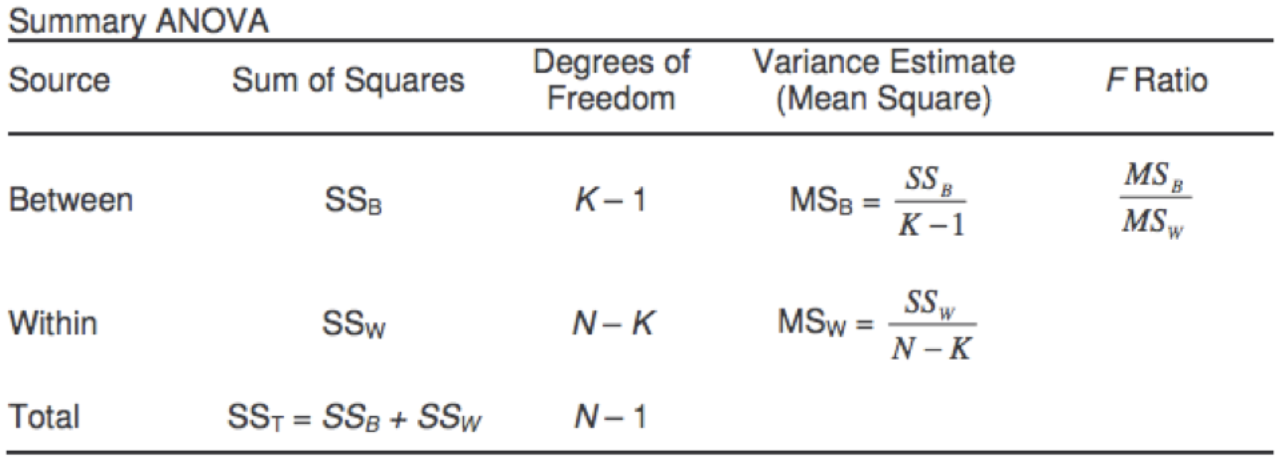

In [65]:
print("f-stat",result[0],"\n")
print("p-value",result[1],"\n")
print("p_value must be greater than 0.05 significance value in order to accept null hypothesis. ")

f-stat [1.80496472e-28] 

p-value [1.] 

p_value must be greater than 0.05 significance value in order to accept null hypothesis. 


In [66]:
if result[1]<0.05:
    print("It states that there will be at least one population mean that differs from the rest ")
else:
    print("μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal/ related)")

μ1 = μ2 = μ3 = … = μk (It implies that the means of all the population are equal/ related)


In [67]:
# Delete the copies of datasets from memory.
del(num_df, df_copy)

# Decomposition of bimodal dependent variable

In [68]:
#Both the dependent variables had to be in relation with each other.
#Trying to decompose the two vectors in one with SVD using PrincipalComponentAnalysis of SciKitLearn
y = df.loc[:,["30_DPD_F3M","BOUNCE_F3M"]]

In [69]:
pca = PCA(n_components=1)
y = pca.fit_transform(y)

<AxesSubplot:>

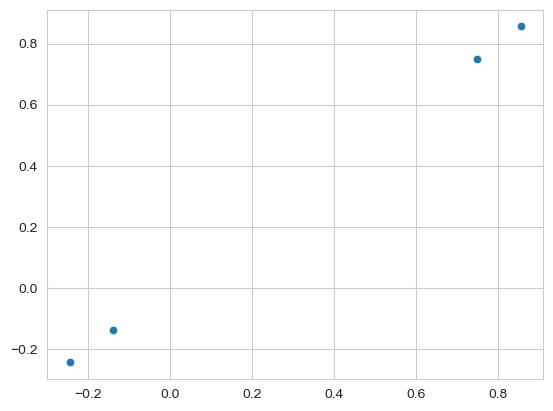

In [70]:
sns.scatterplot(x = y[:,0], y=y[:,0])

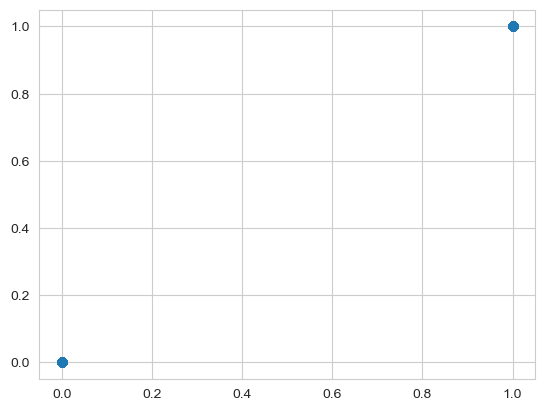

In [71]:
for x in range(len(y)):
    if y[x] <0.0:
        y[x] = 0
    elif y[x] >0.0:
        y[x] = 1

#It basically worked like an 'AND' GATE for the two features combined as one.
plt.scatter(x=y,y=y)

In [72]:
df['y']  = y

df.describe()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Consumer_TL,Gold_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_dbt,num_lss,recent_level_of_deliq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,y
count,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,5.129600e+04,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.000000,51296.00000,51296.000000
mean,4.861471,2.772321,2.089149,0.737328,0.184718,0.089164,0.577349,0.422651,1.504874,0.737426,0.395492,0.150106,0.546748,1.136970,1.563046,0.282712,2.846752,2.014718,1.089773,45.376969,15.780022,1.574977,13.532498,0.480427,0.729453,0.427304,9.211849,1.485184,3.322033,0.062695,0.025967,0.015108,11.274875,33.759728,2.642537e+04,110.714617,0.577349,0.303191,0.190455,0.065203,0.170518,0.05632,0.242456
std,7.179141,5.943536,2.291375,1.297059,0.297486,0.205700,0.379804,0.379804,2.119809,1.454542,0.391927,0.257334,1.085863,2.228639,5.378357,0.858461,6.189165,3.199333,2.418314,41.737151,21.995676,4.166403,53.356431,1.522745,2.763122,2.102190,21.315637,3.365637,7.520773,0.801529,0.635859,0.529936,46.117206,8.816649,2.003178e+04,76.042109,0.379804,0.406119,0.376245,0.235748,0.350220,0.21354,0.428573
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,21.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,27.000000,1.800000e+04,61.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
50%,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.556000,0.444000,1.000000,0.000000,0.333000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,33.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,32.000000,2.300000e+04,93.000000,0.556000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
75%,5.000000,3.000000,3.000000,1.000000,0.312000,0.054000,1.000000,0.750000,2.000000,1.000000,0.750000,0.250000,1.000000,1.000000,1.000000,0.000000,3.000000,2.000000,1.000000,64.000000,17.000000,1.000000,10.000000,0.000000,0.000000,0.000000,9.000000,1.000000,3.000000,0.000000,0.000000,0.000000,7.000000,39.000000,3.000000e+04,131.000000,1.000000,0.654250,0.000000,0.000000,0.000000,0.00000,0.000000
max,235.000000,216.000000,47.000000,27.000000,1.000000,1.000000,1.000000,1.000000,39.000000,39.000000,1.000000,1.000000,34.000000,41.000000,235.000000,29.000000,235.000000,55.000000,80.000000,392.000000,392.000000,74.000000,900.000000,28.000000,60.000000,52.000000,422.000000,60.000000,122.000000,42.000000,35.000000,72.000000,900.000000,77.000000,2.500000e+06,1020.000000,1.000000

In [73]:
#dropping both of the dependent variables
df.drop(columns=['30_DPD_F3M','BOUNCE_F3M'],axis=1,inplace=True)

In [74]:
# Changing Display format with four significant digits past decimal
pd.set_option('display.float_format', lambda x: '%.4f' % x)

# Chi-Square test on categorical variable

In [75]:
df['y'] = df['y'].astype('category')

df_cat_ = df.select_dtypes('category')

In [76]:
df_cat_.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51296 entries, 0 to 51295
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype   
---  ------               --------------  -----   
 0   Tot_TL_closed_L6M    51296 non-null  category
 1   Auto_TL              51296 non-null  category
 2   CC_TL                51296 non-null  category
 3   Home_TL              51296 non-null  category
 4   num_deliq_6mts       51296 non-null  category
 5   num_deliq_6_12mts    51296 non-null  category
 6   num_sub_6mts         51296 non-null  category
 7   num_sub_12mts        51296 non-null  category
 8   num_dbt_6mts         51296 non-null  category
 9   num_dbt_12mts        51296 non-null  category
 10  num_lss_6mts         51296 non-null  category
 11  num_lss_12mts        51296 non-null  category
 12  EDUCATION            51296 non-null  category
 13  CC_Flag              51296 non-null  category
 14  PL_Flag              51296 non-null  category
 15  HL_Flag            

In [77]:
# Chi-square test does not count on all zeroes in observed values. Hence dropping them with following code:
try:
    zero_rows_ = df_cat_[df_cat_[df_cat_.columns].eq(0).all(1)].index

    df_cat_ = df_cat_.drop(index= zero_rows_, axis=0)

except Exception as e:
    print(e)


In [78]:
df_cat_

,Tot_TL_closed_L6M,Auto_TL,CC_TL,Home_TL,num_deliq_6mts,num_deliq_6_12mts,num_sub_6mts,num_sub_12mts,num_dbt_6mts,num_dbt_12mts,num_lss_6mts,num_lss_12mts,EDUCATION,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Single,delinquent_flag_yes,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4,4,0,1,1.0000
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2,1,0,0.0000
2,0,1,0,0,1,8,0,0,0,0,0,0,5,0,0,1,0,2,5,0,1,0.0000
3,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,5,0,0,1.0000
4,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,1.0000
51292,1,2,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,5,0,0,0.0000
51293,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,2,5,0,0,0.0000
51294,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,5,1,0,0.0000


In [79]:
df_cat_ = pd.DataFrame(df_cat_, columns = df.select_dtypes('category').columns)

for _ in df_cat_.columns:
    display(_)
    display(df_cat_.groupby('y')[_].value_counts().unstack())

'Tot_TL_closed_L6M'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,18,19
y,,,,,,,,,,,,,,,,,,
0.0,28440,6840,1965,759,385,199,113,49,29,25,14,7,3,0,3,2,0,3
1.0,9518,2055,525,159,74,46,24,12,10,3,1,6,0,2,1,0,1,0


'Auto_TL'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,23,27
y,,,,,,,,,,,,,,,,,
0.0,21980,12522,2930,854,312,119,58,27,9,8,2,4,3,4,2,1,1
1.0,7286,4036,818,193,61,22,9,7,2,0,1,1,1,0,0,0,0


'CC_TL'

,0,1,2,3,4,5,6,7,8,9,10,11,13,14,27
y,,,,,,,,,,,,,,,
0.0,34958,2954,574,190,86,30,19,10,7,2,1,1,2,1,1
1.0,11722,601,71,24,13,3,1,1,0,1,0,0,0,0,0


'Home_TL'

,0,1,2,3,4,5,6,7,10
y,,,,,,,,,
0.0,36584,1712,396,90,34,15,3,1,1
1.0,11975,379,63,11,5,3,0,1,0


'num_deliq_6mts'

,0,1,2,3,4,5,6,7,8,9,10,11,12
y,,,,,,,,,,,,,
0.0,35444,1692,780,383,321,137,42,13,12,4,5,1,2
1.0,11047,761,316,151,113,31,14,3,1,0,0,0,0


'num_deliq_6_12mts'

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,16,17,20
y,,,,,,,,,,,,,,,,,,
0.0,34568,1781,931,570,358,225,283,45,28,11,12,9,9,2,1,1,1,1
1.0,10556,803,457,221,158,97,96,18,11,10,7,2,0,1,0,0,0,0


'num_sub_6mts'

,0,1,2,3,4,5,8
y,,,,,,,
0.0,38798,11,9,6,7,4,1
1.0,12424,7,5,0,0,1,0


'num_sub_12mts'

,0,1,2,3,4,5,6,7,8,9,10,11,12,20
y,,,,,,,,,,,,,,
0.0,38722,44,26,10,2,7,10,1,3,1,5,3,1,1
1.0,12393,17,16,4,4,2,1,0,0,0,0,0,0,0


'num_dbt_6mts'

,0,2,3,4,5,6
y,,,,,,
0.0,38826,0,3,6,1,0
1.0,12431,1,1,2,1,1


'num_dbt_12mts'

,0,1,2,3,4,5,8,9,10,11,12
y,,,,,,,,,,,
0.0,38808,3,7,3,3,2,0,4,5,1,0
1.0,12425,1,4,1,0,1,1,1,1,1,1


'num_lss_6mts'

,0,1,2,3,4,5,12
y,,,,,,,
0.0,38827,0,2,1,4,1,1
1.0,12434,1,0,0,1,1,0


'num_lss_12mts'

,0,1,2,3,4,5,8,9,10,11,30
y,,,,,,,,,,,
0.0,38818,3,4,1,0,2,1,1,4,1,1
1.0,12430,2,1,1,1,1,1,0,0,0,0


'EDUCATION'

,0,1,2,3,4,5,6
y,,,,,,,
0.0,10731,13124,2158,1839,206,6639,4139
1.0,3704,3531,757,401,63,2629,1352


'CC_Flag'

,0,1
y,,
0.0,34958,3878
1.0,11722,715


'PL_Flag'

,0,1
y,,
0.0,32235,6601
1.0,10421,2016


'HL_Flag'

,0,1
y,,
0.0,27956,10880
1.0,9400,3037


'GL_Flag'

,0,1
y,,
0.0,36584,2252
1.0,11975,462


'last_prod_enq2'

,5,2,4,1,0,3
y,,,,,,
0.0,15913,12977,6053,1989,1156,748
1.0,4895,4805,1902,349,332,154


'first_prod_enq2'

,5,2,4,0,1,3
y,,,,,,
0.0,21117,8785,3716,2237,1834,1147
1.0,6978,3067,1169,609,353,261


'Single'

,0,1
y,,
0.0,28853,9983
1.0,8848,3589


'delinquent_flag_yes'

,0,1
y,,
0.0,27803,11033
1.0,8083,4354


'y'

,0.0,1.0
y,,
0.0,38836,0
1.0,0,12437


In [80]:
dependent_var = []

for _ in df_cat_.columns:
    print("For ",_ ,"and dependent var y")
    
    stat, p_, dof_, expected_ = chi2_contingency(df_cat_.groupby('y')[_].value_counts().unstack())

    expected_ = pd.DataFrame(expected_,columns=df_cat_[_].unique())

    p_val_ = 1 - significance

    critical_value2 = chi2.ppf(p_val_, dof_)

    print('chi=%.6f, critical value=%.6f\n' % (stat, critical_value2))
    if stat > critical_value2:
        
        print("""At %.2f level of significance, we reject the null hypotheses and accept H1. 
    They are not independent.""" % (significance),"\n")
        
        dependent_var.append(_)
        
    else:
        print("""At %.2f level of significance, we accept the null hypotheses. 
    They are independent.""" % (significance),"\n")

For  Tot_TL_closed_L6M and dependent var y
chi=103.269729, critical value=27.587112

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent. 

For  Auto_TL and dependent var y
chi=66.496253, critical value=26.296228

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent. 

For  CC_TL and dependent var y
chi=225.064309, critical value=23.684791

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent. 

For  Home_TL and dependent var y
chi=89.971010, critical value=15.507313

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent. 

For  num_deliq_6mts and dependent var y
chi=94.414299, critical value=21.026070

At 0.05 level of significance, we reject the null hypotheses and accept H1. 
    They are not independent. 

For  num_deliq_6_12mts and dependent var y
chi=177.322278, critical 

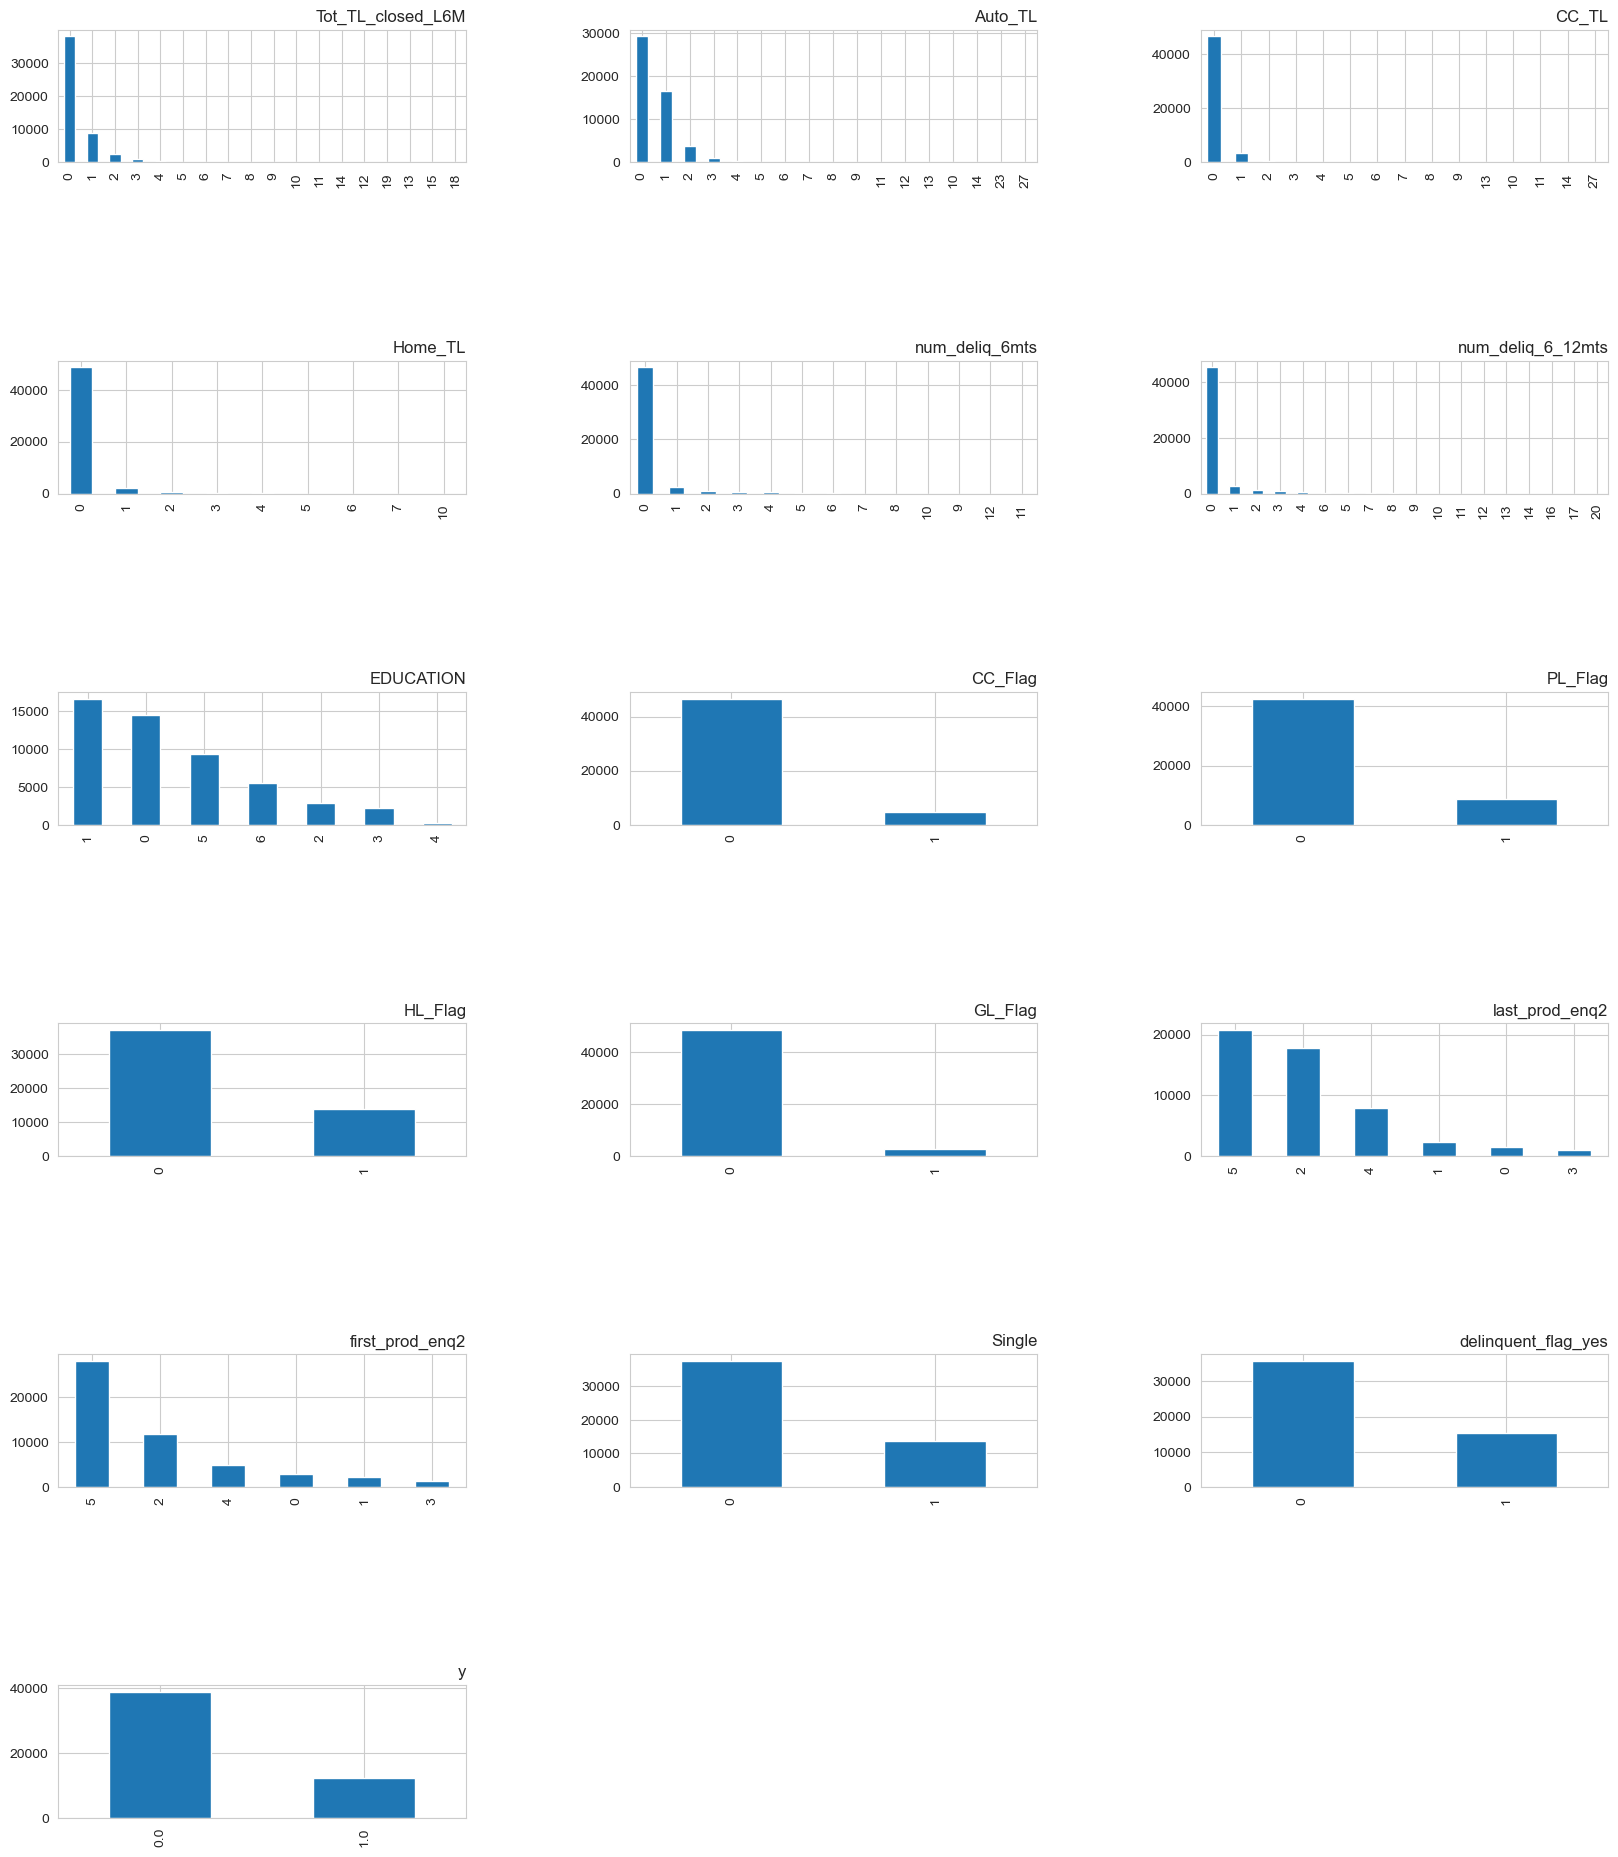

In [81]:
try:
    k=0
    plt.figure(figsize=(20,25))
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for col in dependent_var:    
        k=k+1
        plt.subplot(8, 3,k)    
        df_cat_[col].value_counts().plot(kind='bar');
        plt.title(col,loc='right')
except Exception as e:
    print(e)

In [82]:
dependent_var

['Tot_TL_closed_L6M',
 'Auto_TL',
 'CC_TL',
 'Home_TL',
 'num_deliq_6mts',
 'num_deliq_6_12mts',
 'EDUCATION',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'last_prod_enq2',
 'first_prod_enq2',
 'Single',
 'delinquent_flag_yes',
 'y']

### Printing Dependence test result with 0.05 level of significance.

In [83]:
# pop the y variable from list and get the final list of dependent variables
dependent_var

['Tot_TL_closed_L6M',
 'Auto_TL',
 'CC_TL',
 'Home_TL',
 'num_deliq_6mts',
 'num_deliq_6_12mts',
 'EDUCATION',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'last_prod_enq2',
 'first_prod_enq2',
 'Single',
 'delinquent_flag_yes',
 'y']

## ______________________________________________________________________________________

# Working with legitimate outliers

In [84]:
df.NETMONTHLYINCOME.describe()

count     51296.0000
mean      26425.3742
std       20031.7792
min           0.0000
25%       18000.0000
50%       23000.0000
75%       30000.0000
max     2500000.0000
Name: NETMONTHLYINCOME, dtype: float64

{'whiskers': [<matplotlib.lines.Line2D at 0x7f8a9b911580>,
 'caps': [<matplotlib.lines.Line2D at 0x7f8a9b911070>,
 'boxes': [<matplotlib.lines.Line2D at 0x7f8a9b911ac0>],
 'medians': [<matplotlib.lines.Line2D at 0x7f8a9b947430>],
 'fliers': [<matplotlib.lines.Line2D at 0x7f8a9b947be0>],
 'means': []}

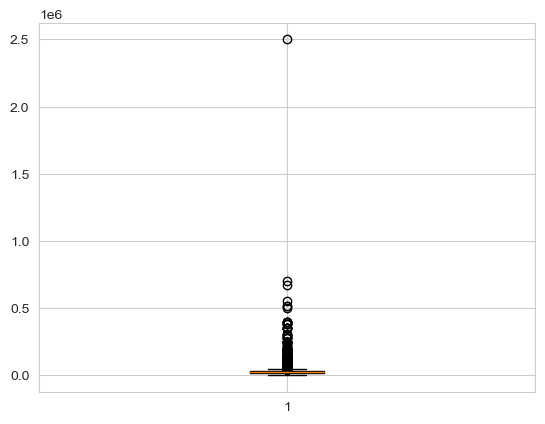

In [85]:
plt.boxplot(df.NETMONTHLYINCOME)

The dataset clearly has data related to income generating entities ranging from citizens to institutions.
Netmonthly income has range of 0 - 25lakhs currency units (be it USD or INR or any other currency)

<AxesSubplot:xlabel='NETMONTHLYINCOME', ylabel='Count'>

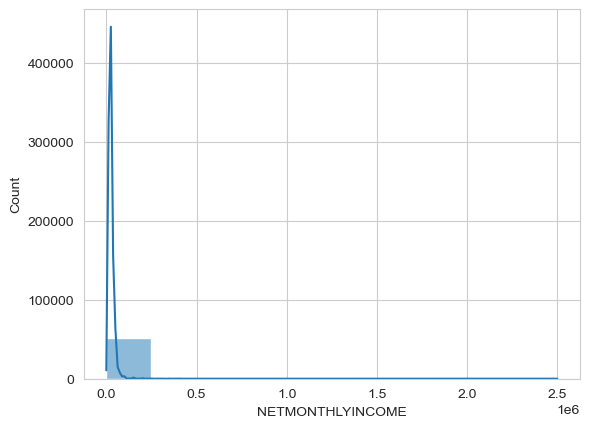

In [86]:
sns.histplot(df.NETMONTHLYINCOME,kde=True,bins=10)

The section below will filter out the outlier in the dataframe with respect to NETMONTHLYINCOME only

This is done to analyse the data in terms which are valid for individual samples and hopefully not institutions

In [87]:
Q1 = np.percentile(df.NETMONTHLYINCOME, 25)
Q2 = np.percentile(df.NETMONTHLYINCOME, 75)

IQR = Q2-Q1
df_income = df.loc[df['NETMONTHLYINCOME']<(1.5*IQR)]

In [88]:
df_income.describe()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Consumer_TL,Gold_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_dbt,num_lss,recent_level_of_deliq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever
count,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000,12587.0000
mean,3.8821,2.1749,1.7072,0.5972,0.1818,0.0913,0.5861,0.4139,1.2460,0.5892,0.4056,0.1563,0.4667,0.8644,1.3373,0.1603,2.4175,1.4646,0.9240,38.3516,16.7917,1.2160,10.5437,0.3957,0.5576,0.3231,7.7705,1.3005,2.8757,0.0534,0.0231,0.0100,9.1963,32.0481,13616.7331,87.2929,0.5861,0.2823,0.1635,0.0393,0.1523,0.0359
std,5.8951,4.9942,1.8711,1.0776,0.3064,0.2208,0.3964,0.3964,1.7372,1.1553,0.4085,0.2776,0.9472,1.6341,4.6606,0.5711,5.3673,2.3343,2.1018,35.8613,22.4487,3.4292,43.9763,1.3320,2.2567,1.7147,18.4606,3.0251,6.6464,0.7996,0.5948,0.3635,39.1270,8.3305,3032.2636,63.8415,0.3964,0.4060,0.3576,0.1872,0.3409,0.1753
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21.0000,0.0000,3.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.2220,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,12.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,25.0000,12000.0000,42.0000,0.2220,0.0000,0.0000,0.0000,0.0000,0.0000
50%,2.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.6000,0.4000,1.0000,0.0000,0.3330,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,27.0000,9.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,30.0000,15000.0000,68.0000,0.6000,0.0000,0.0000,0.0000,0.0000,0.0000
75%,4.0000,2.0000,2.0000,1.0000,0.3000,0.0000,1.0000,0.7780,2.0000,1.0000,1.0000,0.2500,1.0000,1.0000,1.0000,0.0000,2.0000,2.0000,1.0000,54.0000,19.0000,1.0000,3.0000,0.0000,0.0000,0.0000,7.0000,1.0000,2.0000,0.0000,0.0000,0.0000,2.0000,37.0000,15000.0000,120.0000,1.0000,0.5000,0.0000,0.0000,0.0000,0.0000
max,118.0000,114.0000,21.0000,16.0000,1.0000,1.0000,1.0000,1.0000,24.0000,21.0000,1.0000,1.0000,12.0000,25.0000,114.0000,10.0000,115.0000,31.0000,36.0000,392.0000,392.0000,74.0000,900.0000,20.0000,47.0000,31.0000,286.0000,60.0000,107.0000,42.0000,26.0000,25.0000,900.0000,67.0000,17999.0000,936.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


num must be 1 <= num <= 16, not 17


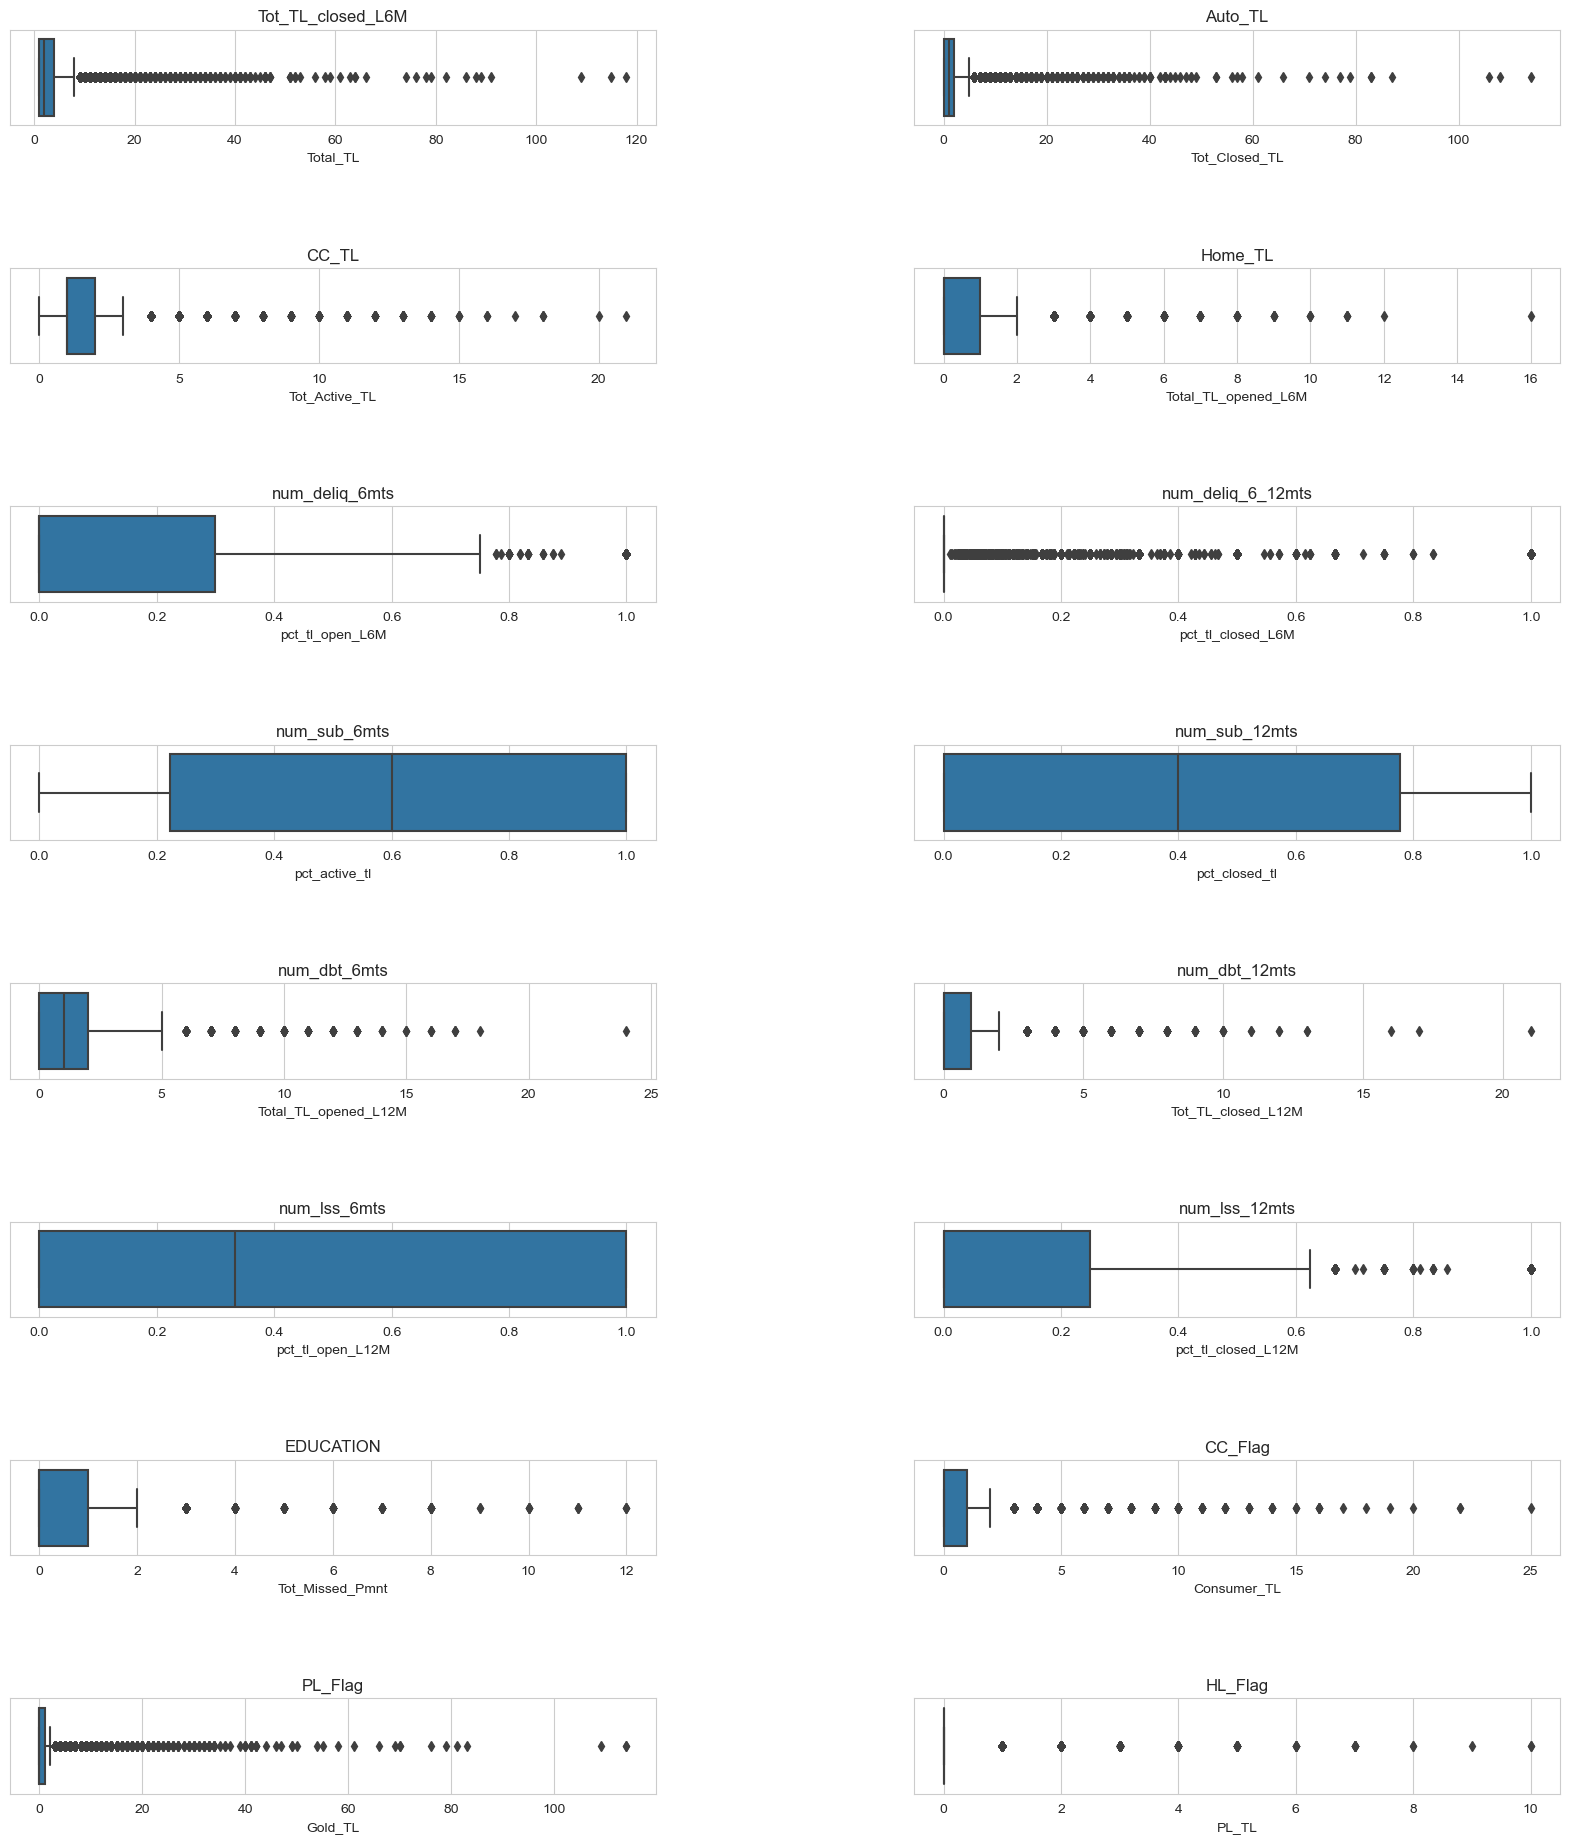

In [89]:
try:
    numeric_col = df_income.select_dtypes('number').columns
    k=0
    plt.figure(figsize=(20,18))
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for col in range (len(numeric_col)-1):    
        k=k+1
        plt.subplot(8, 2, k,title=list_category[col])   
        ax = sns.boxplot(x = numeric_col[col], data = df_income)
        
except Exception as e:
    print(e)

In [90]:
df_income_high = df.loc[df['NETMONTHLYINCOME']>(1.5*IQR)]

In [91]:
df_income_high.replace(-99999.00, np.nan, inplace=True)

In [92]:
df_income_high.describe()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Consumer_TL,Gold_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_dbt,num_lss,recent_level_of_deliq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever
count,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000,35745.0000
mean,5.2700,3.0298,2.2402,0.7904,0.1844,0.0877,0.5727,0.4273,1.6036,0.7945,0.3896,0.1467,0.5779,1.2399,1.6699,0.3322,3.0418,2.2282,1.1625,48.3494,15.4622,1.7262,14.6750,0.5172,0.8023,0.4723,9.8952,1.5707,3.5317,0.0661,0.0274,0.0178,12.0184,34.4749,31634.3594,120.0038,0.5727,0.3102,0.2014,0.0756,0.1778,0.0646
std,7.6281,6.3070,2.4169,1.3672,0.2927,0.1985,0.3730,0.3730,2.2401,1.5517,0.3847,0.2477,1.1200,2.4174,5.6643,0.9462,6.5201,3.4587,2.5500,43.5995,21.8847,4.4392,56.1799,1.6013,2.9424,2.2427,22.5030,3.5118,7.8884,0.7872,0.6553,0.5964,47.8861,8.9333,21950.4153,78.4657,0.3730,0.4055,0.3832,0.2519,0.3538,0.2267
min,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,21.0000,18018.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
25%,1.0000,0.0000,1.0000,0.0000,0.0000,0.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,15.0000,4.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,27.0000,22500.0000,65.0000,0.2500,0.0000,0.0000,0.0000,0.0000,0.0000
50%,3.0000,1.0000,1.0000,0.0000,0.0000,0.0000,0.5380,0.4620,1.0000,0.0000,0.3080,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,1.0000,0.0000,36.0000,8.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,33.0000,28000.0000,103.0000,0.5380,0.0000,0.0000,0.0000,0.0000,0.0000
75%,6.0000,3.0000,3.0000,1.0000,0.3000,0.0710,1.0000,0.7500,2.0000,1.0000,0.6670,0.2410,1.0000,1.0000,1.0000,0.0000,3.0000,3.0000,1.0000,68.0000,17.0000,1.0000,13.0000,0.0000,0.0000,0.0000,10.0000,2.0000,4.0000,0.0000,0.0000,0.0000,9.0000,40.0000,35000.0000,150.0000,1.0000,0.6670,0.0000,0.0000,0.0000,0.0000
max,235.0000,216.0000,47.0000,27.0000,1.0000,1.0000,1.0000,1.0000,39.0000,39.0000,1.0000,1.0000,28.0000,41.0000,235.0000,29.0000,235.0000,55.0000,80.0000,385.0000,359.0000,67.0000,900.0000,28.0000,60.0000,52.0000,422.0000,58.0000,122.0000,40.0000,35.0000,72.0000,900.0000,77.0000,2500000.0000,841.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000


In [93]:
edu

[('12TH', 16655),
 ('GRADUATE', 14458),
 ('SSC', 9268),
 ('POST_GRADUATE', 5491),
 ('UNDER GRADUATE', 2915),
 ('OTHERS', 2240),
 ('PROFESSIONAL', 269)]

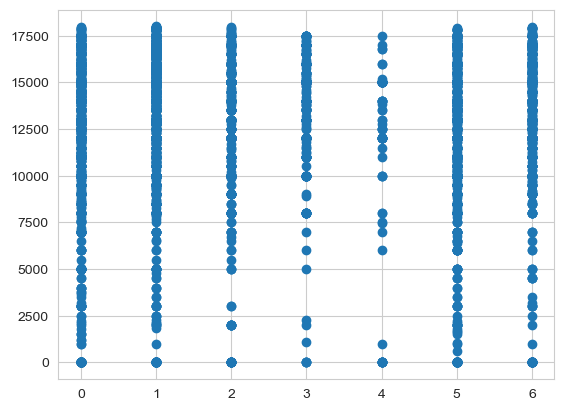

In [94]:
plt.scatter(y = df_income['NETMONTHLYINCOME'], x = df_income['EDUCATION'])

# Statistical EDA for Numerical Data

Find the numerical columns and apply statistical EDA tools to publish univariate statistics

In [95]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51296 entries, 0 to 51295
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Total_TL                    51296 non-null  int64   
 1   Tot_Closed_TL               51296 non-null  int64   
 2   Tot_Active_TL               51296 non-null  int64   
 3   Total_TL_opened_L6M         51296 non-null  int64   
 4   Tot_TL_closed_L6M           51296 non-null  category
 5   pct_tl_open_L6M             51296 non-null  float64 
 6   pct_tl_closed_L6M           51296 non-null  float64 
 7   pct_active_tl               51296 non-null  float64 
 8   pct_closed_tl               51296 non-null  float64 
 9   Total_TL_opened_L12M        51296 non-null  int64   
 10  Tot_TL_closed_L12M          51296 non-null  int64   
 11  pct_tl_open_L12M            51296 non-null  float64 
 12  pct_tl_closed_L12M          51296 non-null  float64 
 13  Tot_Missed_Pmnt 

In [96]:
feat = df.columns
list_category_2 = []
print("The type of feature : \n")
for x in feat:
    if df[x].nunique() < 20:
        print(x,"is categorical")
        list_category_2.append(x)

The type of feature : 

Tot_TL_closed_L6M is categorical
Auto_TL is categorical
CC_TL is categorical
Home_TL is categorical
num_deliq_6mts is categorical
num_deliq_6_12mts is categorical
num_sub_6mts is categorical
num_sub_12mts is categorical
num_dbt_6mts is categorical
num_dbt_12mts is categorical
num_lss_6mts is categorical
num_lss_12mts is categorical
EDUCATION is categorical
CC_Flag is categorical
PL_Flag is categorical
HL_Flag is categorical
GL_Flag is categorical
last_prod_enq2 is categorical
first_prod_enq2 is categorical
Single is categorical
delinquent_flag_yes is categorical
y is categorical


In [97]:
df2 = df.copy()
print(id(df) , id(df2))

140234125911568 140234099714416


In [98]:
df2[list_category_2].astype('category')

,Tot_TL_closed_L6M,Auto_TL,CC_TL,Home_TL,num_deliq_6mts,num_deliq_6_12mts,num_sub_6mts,num_sub_12mts,num_dbt_6mts,num_dbt_12mts,num_lss_6mts,num_lss_12mts,EDUCATION,CC_Flag,PL_Flag,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Single,delinquent_flag_yes,y
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,4,4,0,1,1.0000
1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,2,2,1,0,0.0000
2,0,1,0,0,1,8,0,0,0,0,0,0,5,0,0,1,0,2,5,0,1,0.0000
3,0,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,5,0,0,1.0000
4,0,1,0,0,0,0,0,0,0,0,0,0,3,0,0,0,0,0,0,0,0,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51291,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,2,0,1,1.0000
51292,1,2,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,5,5,0,0,0.0000
51293,1,0,0,0,0,0,0,0,0,0,0,0,5,0,0,0,0,2,5,0,0,0.0000
51294,0,0,0,0,0,0,0,0,0,0,0,0,6,0,0,0,0,2,5,1,0,0.0000


In [99]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 51296 entries, 0 to 51295
Data columns (total 64 columns):
 #   Column                      Non-Null Count  Dtype   
---  ------                      --------------  -----   
 0   Total_TL                    51296 non-null  int64   
 1   Tot_Closed_TL               51296 non-null  int64   
 2   Tot_Active_TL               51296 non-null  int64   
 3   Total_TL_opened_L6M         51296 non-null  int64   
 4   Tot_TL_closed_L6M           51296 non-null  category
 5   pct_tl_open_L6M             51296 non-null  float64 
 6   pct_tl_closed_L6M           51296 non-null  float64 
 7   pct_active_tl               51296 non-null  float64 
 8   pct_closed_tl               51296 non-null  float64 
 9   Total_TL_opened_L12M        51296 non-null  int64   
 10  Tot_TL_closed_L12M          51296 non-null  int64   
 11  pct_tl_open_L12M            51296 non-null  float64 
 12  pct_tl_closed_L12M          51296 non-null  float64 
 13  Tot_Missed_Pmnt 

In [100]:
col_numeric = df.select_dtypes('number').columns

In [101]:
len(col_numeric)

42

In [102]:
#Check for rows with all column values zero
df2[df2[df2.columns].eq(0).all(1)]

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,Tot_TL_closed_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Auto_TL,CC_TL,Consumer_TL,Gold_TL,Home_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_6mts,num_deliq_12mts,num_deliq_6_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,EDUCATION,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,CC_Flag,PL_Flag,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,HL_Flag,GL_Flag,last_prod_enq2,first_prod_enq2,Single,delinquent_flag_yes,y


Running the following code will take longer than usual. Please do not run the code:

In [103]:
# try:
#     plt.figure(figsize=(12,12))
#     sns.pairplot(df[col_numeric])
#     plt.show()
# except:
#     pass

# EDA using the Stem and Leaf graph

To understand the number distribution using this plain old stem and leaf diagram.

In [104]:
pd.DataFrame(dict({'Age':df2['AGE'].unique(),'count':df2['AGE'].value_counts()}))

,Age,count
28,48,2532
29,23,2527
27,40,2516
26,34,2449
30,35,2433
25,30,2387
24,39,2331
32,28,2295
31,27,2294
33,57,2104


### Figure for the numerical features' distribution

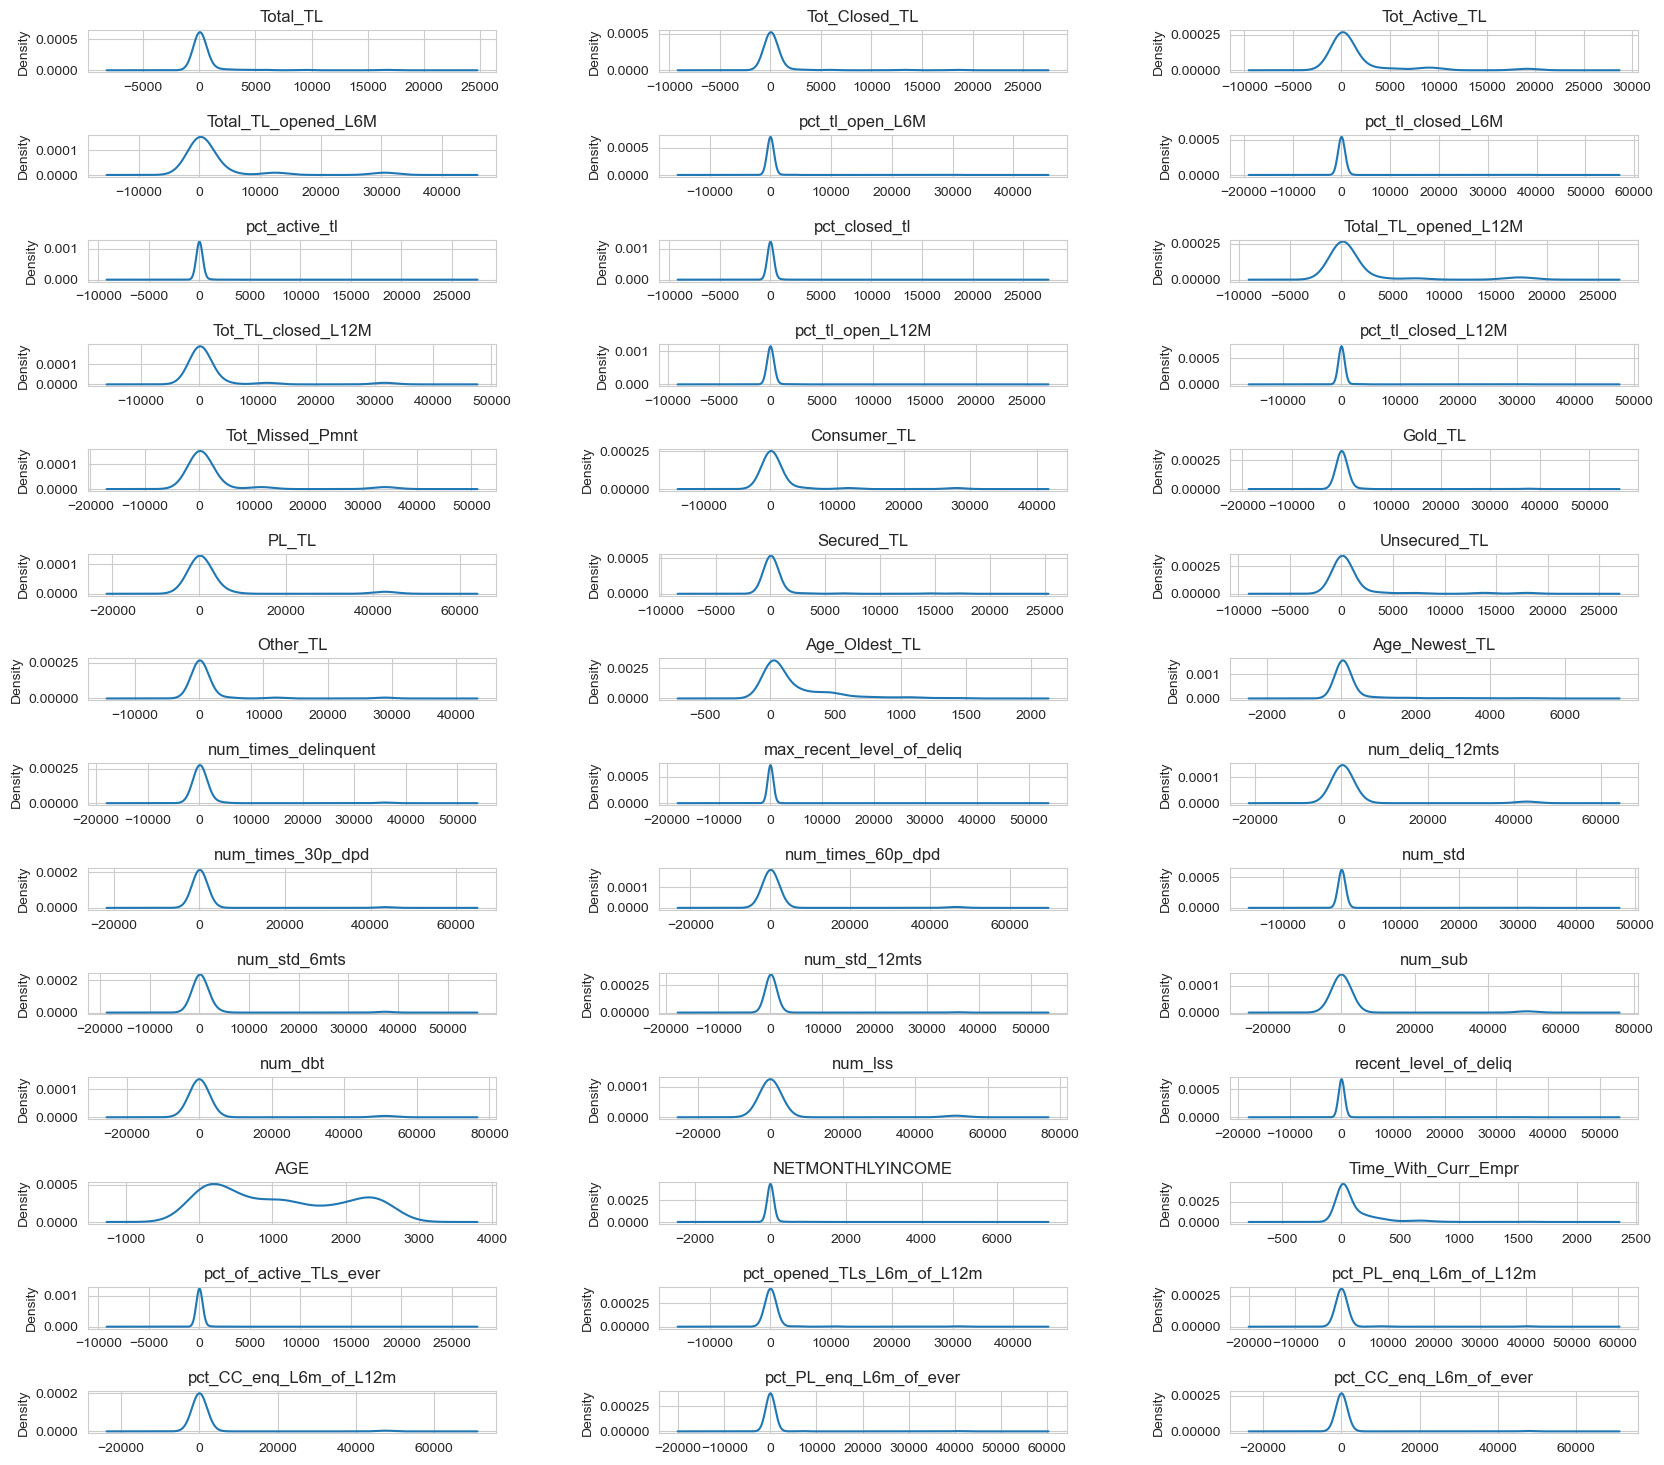

In [105]:
try:
    k=0
    plt.figure(figsize=(20,25),dpi=100)
    plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=1.5, wspace=0.4)
    for col in col_numeric:    
        k=k+1
        plt.subplot(24, 3,k)    
        df2[col].value_counts().plot(kind='kde',bw_method=0.3);
        plt.title(col,loc='center')
except Exception as e:
    print(e)

(<Figure size 750x2100 with 1 Axes>, <Axes:>)

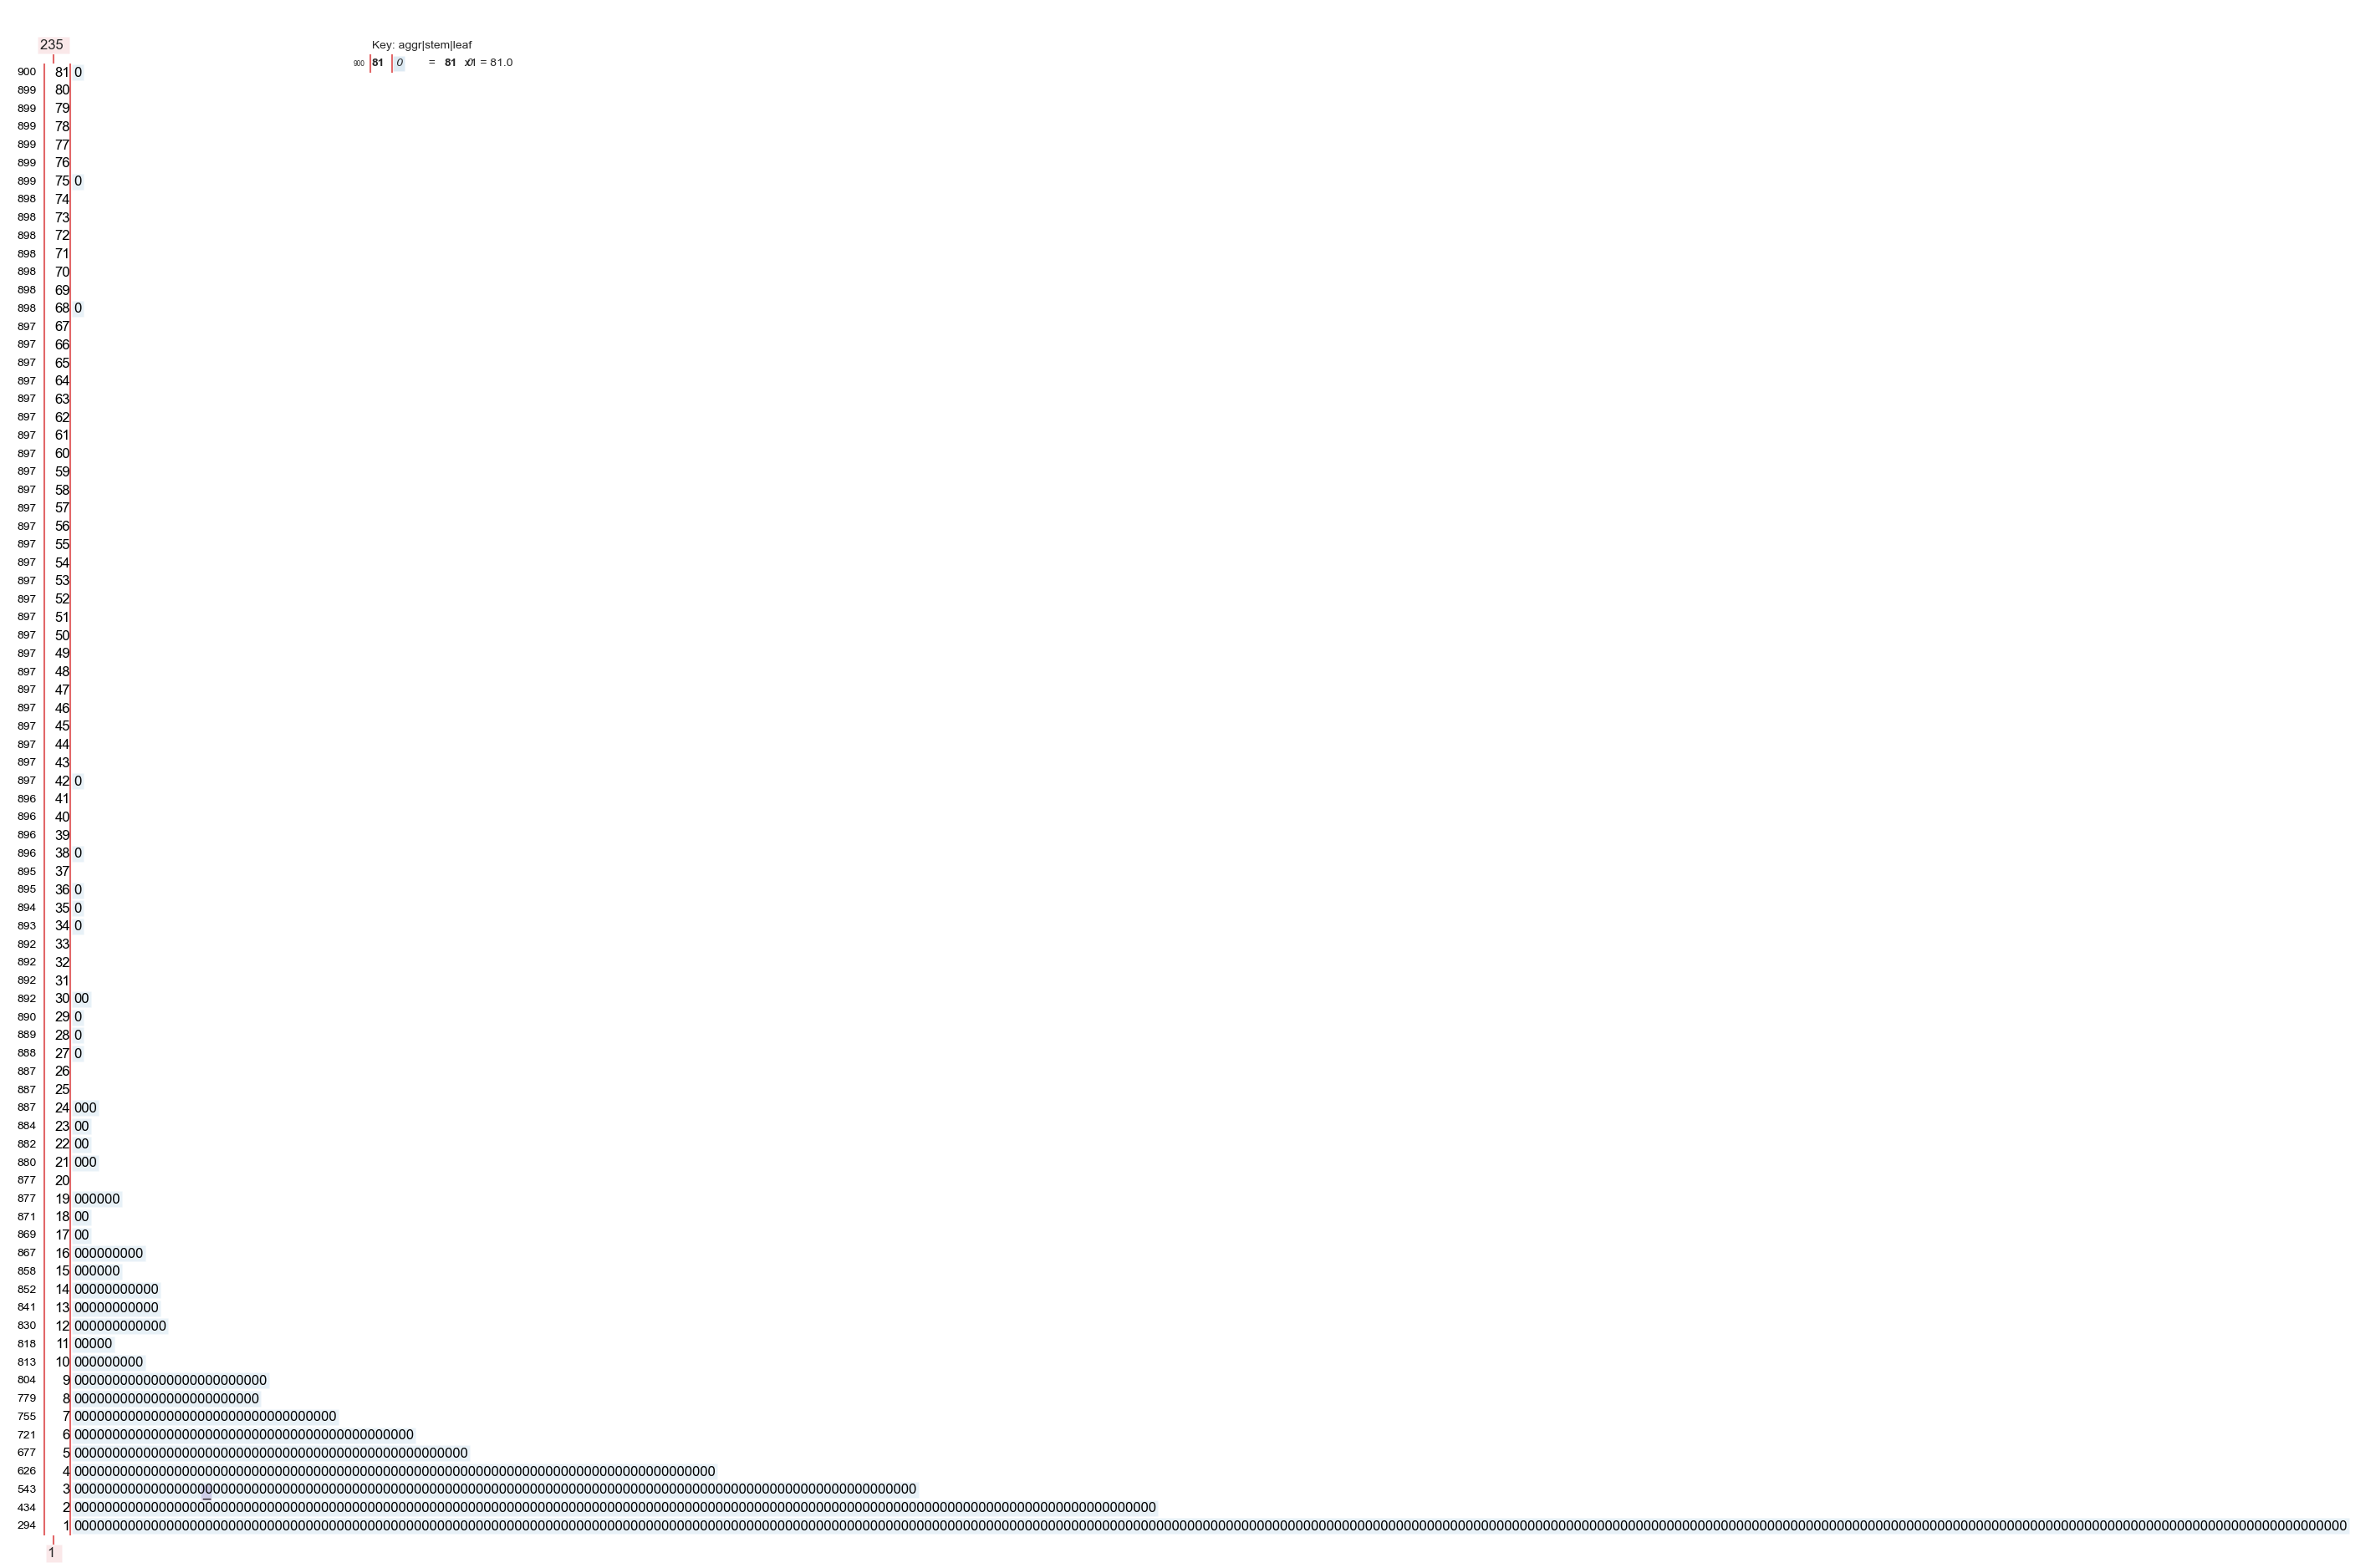

In [106]:
import stemgraphic
stemgraphic.stem_graphic(df['Total_TL'], scale = 1)

(<Figure size 950x500 with 1 Axes>, <Axes:>)

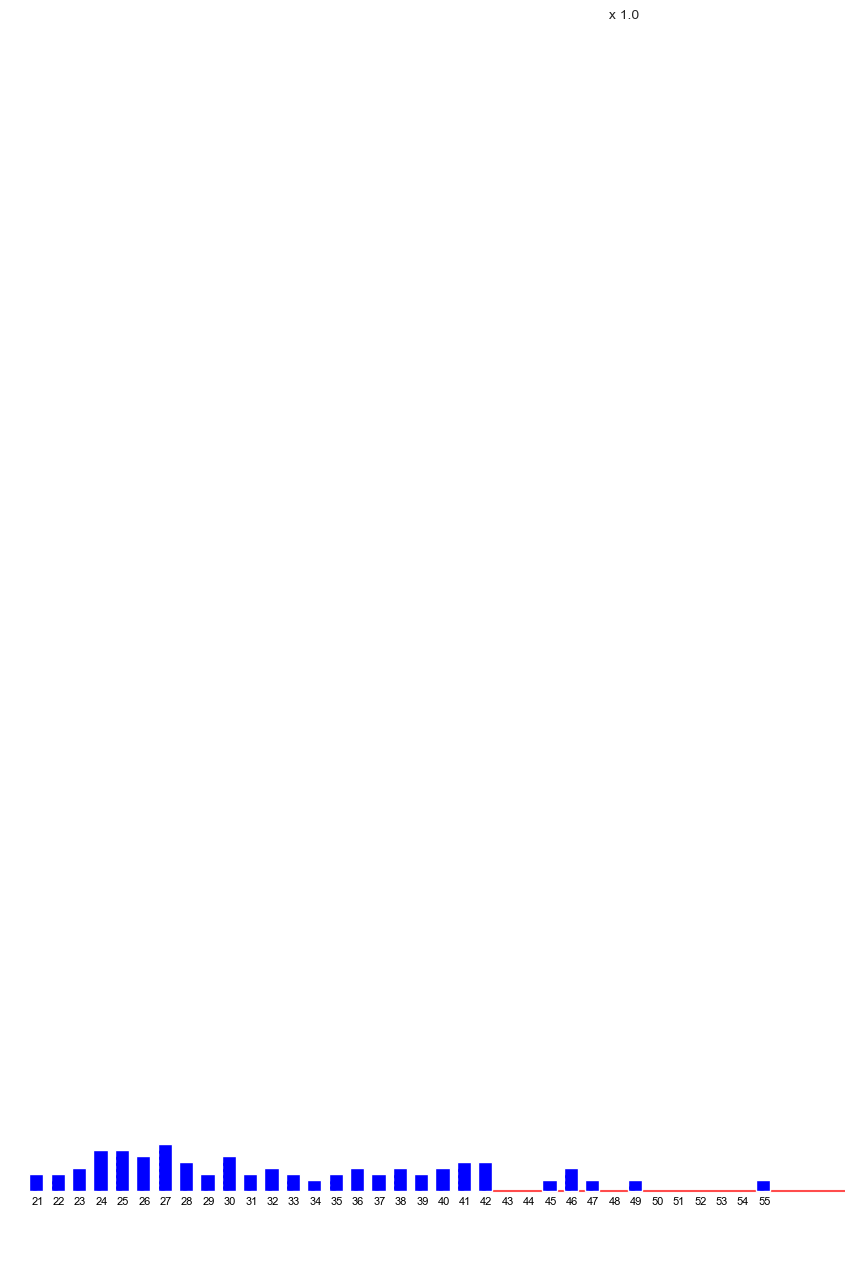

In [107]:
stemgraphic.stem_hist(df['AGE'],display=80,)

(<Figure size 450x3575 with 1 Axes>, <Axes:>)

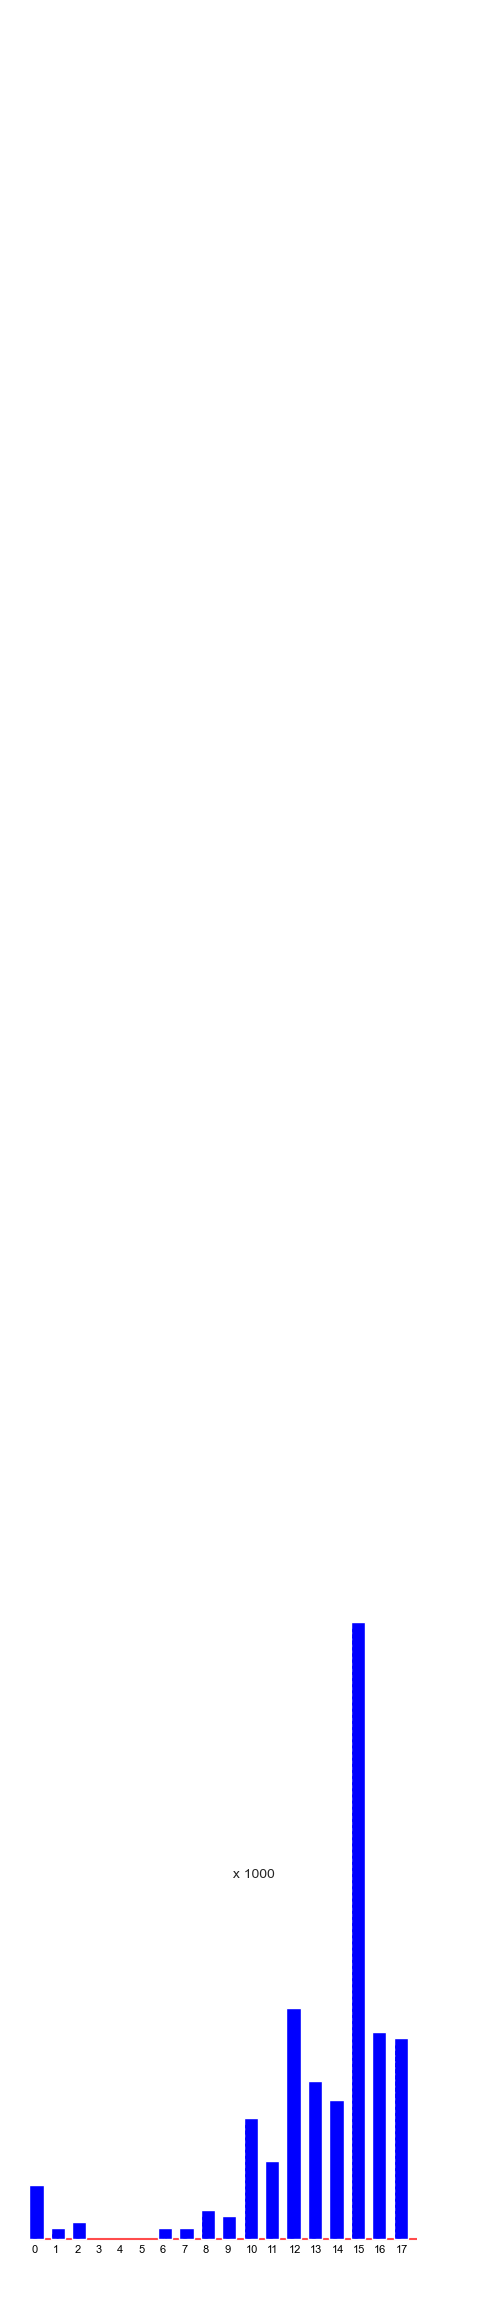

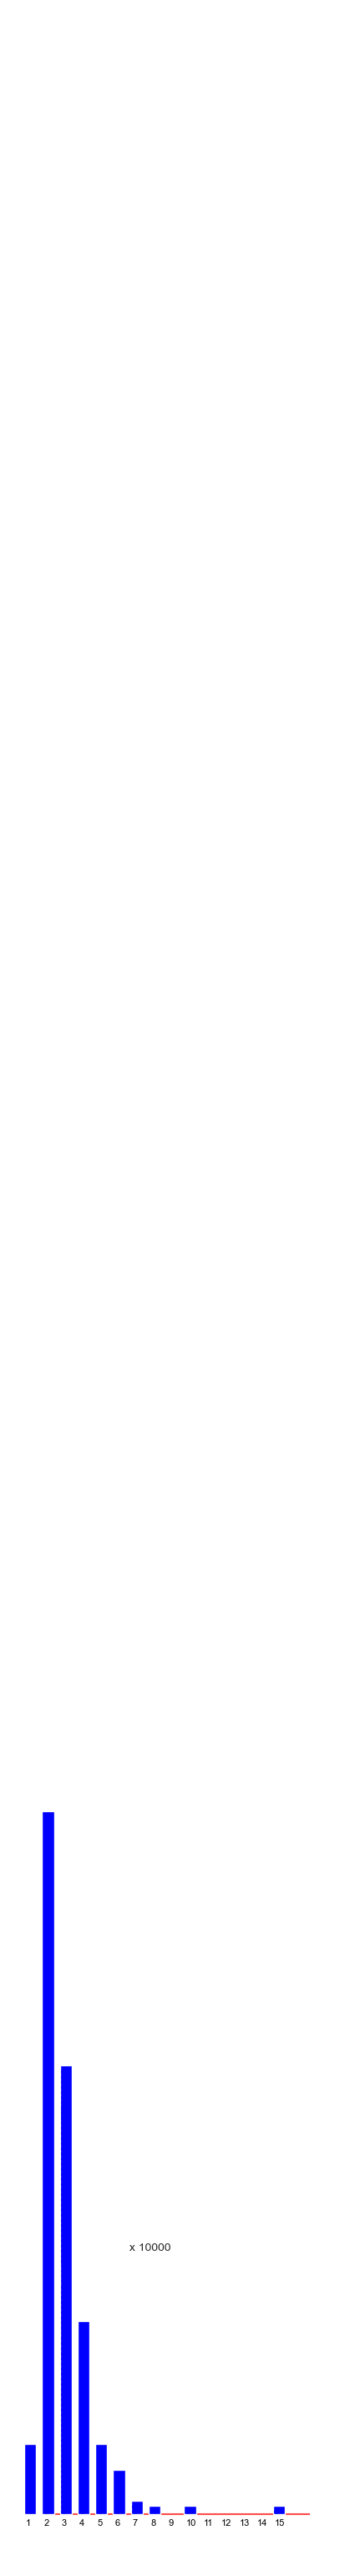

In [108]:
stemgraphic.stem_hist(df_income['NETMONTHLYINCOME'])
stemgraphic.stem_hist(df_income_high['NETMONTHLYINCOME'])

# Heatmap for correlation identification

Heat Map to check for any correlated feature

<AxesSubplot:>

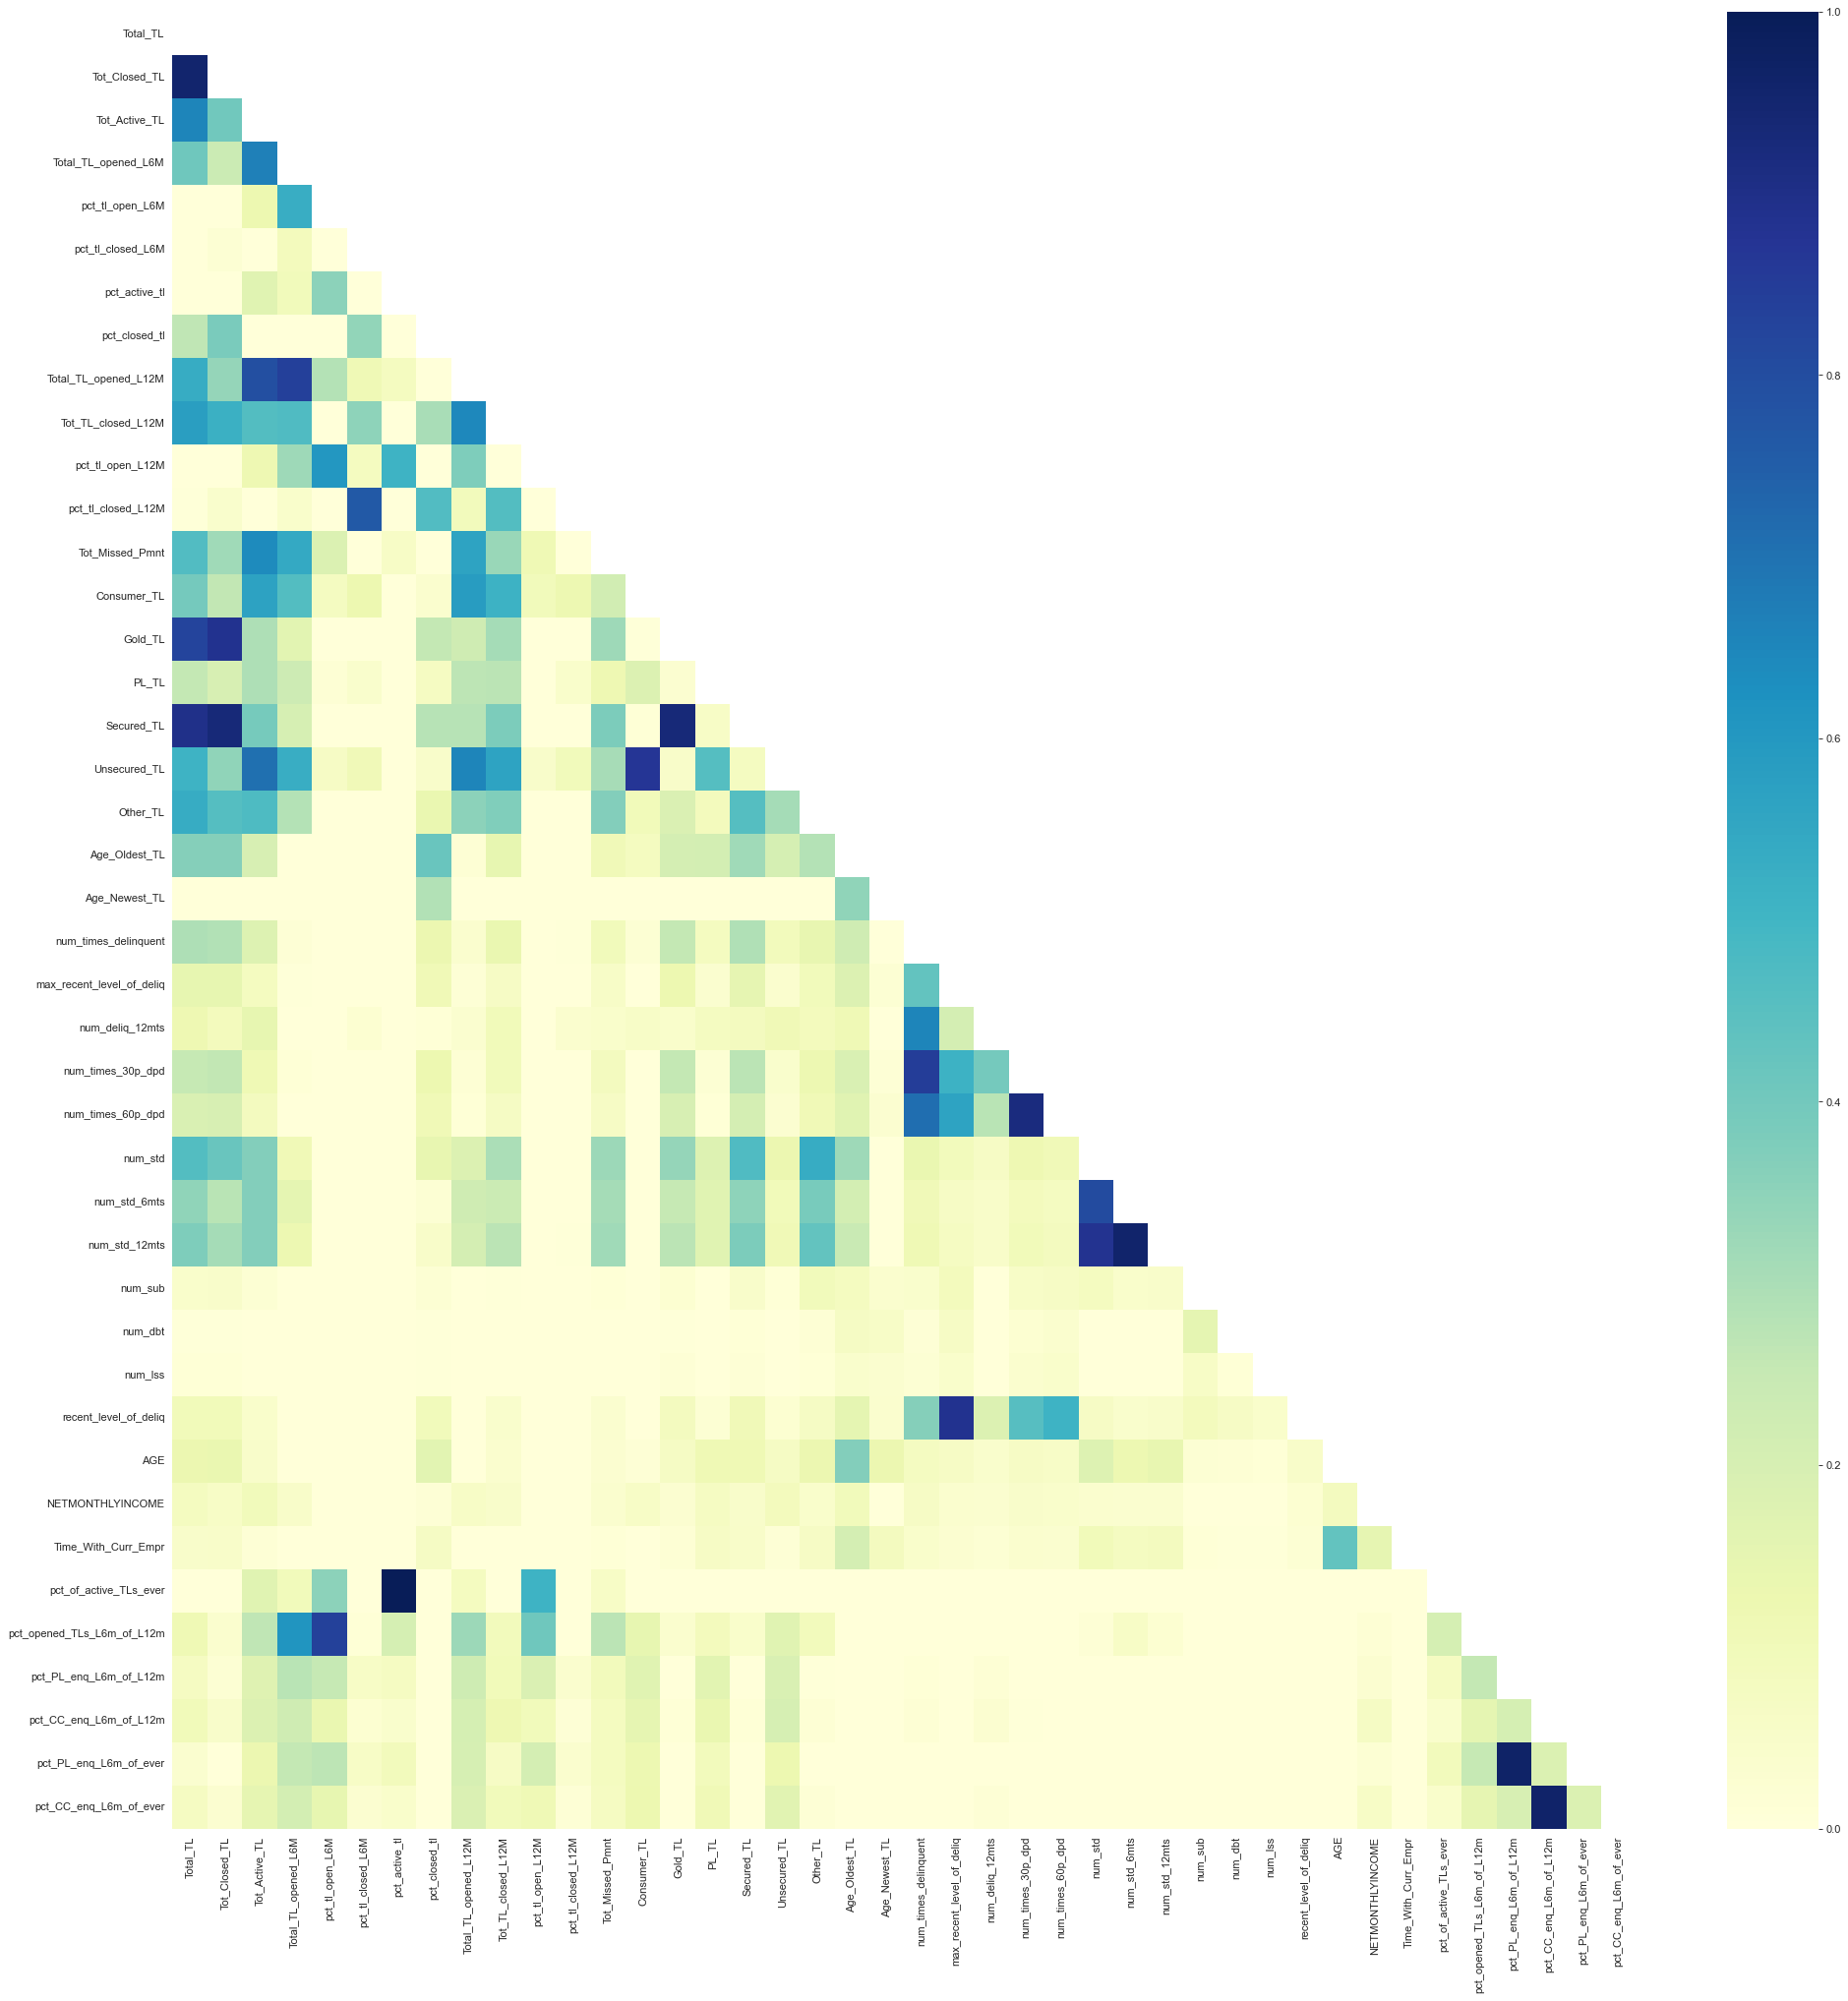

In [109]:
fig2 = plt.figure(figsize=(30,30), dpi=80)

sns.heatmap(df2[col_numeric].corr(), vmax=1, vmin=0,cmap='YlGnBu', mask=np.triu(np.ones_like(df2.corr())))

# Following section cleans dependent features found in chi_square test

In [110]:
dependent_var.pop()

dependent_var

['Tot_TL_closed_L6M',
 'Auto_TL',
 'CC_TL',
 'Home_TL',
 'num_deliq_6mts',
 'num_deliq_6_12mts',
 'EDUCATION',
 'CC_Flag',
 'PL_Flag',
 'HL_Flag',
 'GL_Flag',
 'last_prod_enq2',
 'first_prod_enq2',
 'Single',
 'delinquent_flag_yes']

In [111]:
decomp_feat_df = df[dependent_var]

pca0 = PCA(n_components=5)

pca0.fit(decomp_feat_df)

decomp_feat_df = pca0.fit_transform(decomp_feat_df)

In [112]:
decomp_feat_df.shape

(51296, 5)

In [113]:
pca0.explained_variance_

array([4.83910514, 3.59221954, 1.53239773, 1.36600733, 0.97868985])

In [114]:
decomp_feat_df  =  pd.DataFrame(decomp_feat_df)
decomp_feat_df.head()

,0,1,2,3,4
0,-2.1091,-0.6635,-0.3543,-0.2891,-0.2824
1,-1.1806,2.1190,-0.1920,-0.9051,-0.5367
2,2.8666,0.5117,2.7626,6.1845,-2.8486
3,2.9105,-1.9981,-0.4449,-0.4238,-0.3205
4,0.7676,4.9444,0.1264,-0.8985,-0.4299


In [115]:
df.shape

(51296, 64)

In [116]:
df = df.join(decomp_feat_df)
df.drop(columns=dependent_var, axis=1, inplace=True)

In [117]:
df.shape #post PCA and cleaning

(51296, 54)

In [118]:
df.head()

,Total_TL,Tot_Closed_TL,Tot_Active_TL,Total_TL_opened_L6M,pct_tl_open_L6M,pct_tl_closed_L6M,pct_active_tl,pct_closed_tl,Total_TL_opened_L12M,Tot_TL_closed_L12M,pct_tl_open_L12M,pct_tl_closed_L12M,Tot_Missed_Pmnt,Consumer_TL,Gold_TL,PL_TL,Secured_TL,Unsecured_TL,Other_TL,Age_Oldest_TL,Age_Newest_TL,num_times_delinquent,max_recent_level_of_deliq,num_deliq_12mts,num_times_30p_dpd,num_times_60p_dpd,num_std,num_std_6mts,num_std_12mts,num_sub,num_sub_6mts,num_sub_12mts,num_dbt,num_dbt_6mts,num_dbt_12mts,num_lss,num_lss_6mts,num_lss_12mts,recent_level_of_deliq,AGE,NETMONTHLYINCOME,Time_With_Curr_Empr,pct_of_active_TLs_ever,pct_opened_TLs_L6m_of_L12m,pct_PL_enq_L6m_of_L12m,pct_CC_enq_L6m_of_L12m,pct_PL_enq_L6m_of_ever,pct_CC_enq_L6m_of_ever,y,0,1,2,3,4
0,5,4,1,0,0.0000,0.0000,0.2000,0.8000,0,0,0.0000,0.0000,0,0,1,4,1,4,0,72.0000,18.0000,11,29,0,0,0,21,5,11,0,0,0,0,0,0,0,0,0,29,48,51000,114,0.2000,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,-2.1091,-0.6635,-0.3543,-0.2891,-0.2824
1,1,0,1,0,0.0000,0.0000,1.0000,0.0000,1,0,1.0000,0.0000,0,1,0,0,0,1,0,7.0000,7.0000,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,23,19000,50,1.0000,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000,-1.1806,2.1190,-0.1920,-0.9051,-0.5367
2,8,0,8,1,0.1250,0.0000,1.0000,0.0000,2,0,0.2500,0.0000,1,6,1,0,2,6,0,47.0000,2.0000,9,25,9,0,0,10,5,10,0,0,0,0,0,0,0,0,0,25,40,18,191,1.0000,0.5000,0.0000,0.0000,0.0000,0.0000,0.0000,2.8666,0.5117,2.7626,6.1845,-2.8486
3,1,0,1,1,1.0000,0.0000,1.0000,0.0000,1,0,1.0000,0.0000,1,0,0,0,0,1,1,5.0000,5.0000,0,0,0,0,0,5,4,5,0,0,0,0,0,0,0,0,0,0,34,10000,246,1.0000,1.0000,0.0000,0.0000,0.0000,0.0000,1.0000,2.9105,-1.9981,-0.4449,-0.4238,-0.3205
4,3,2,1,0,0.0000,0.0000,0.3330,0.6670,0,0,0.0000,0.0000,0,0,0,0,3,0,2,131.0000,32.0000,0,0,0,0,0,53,4,16,0,0,0,0,0,0,0,0,0,0,48,15000,75,0.3330,0.0000,0.0000,0.0000,0.0000,0.0000,1.0000,0.7676,4.9444,0.1264,-0.8985,-0.4299


In [119]:
if df.isna().sum()[1].any() > 0:
    print("contains nan values")
else:
    print("no nan values present")

no nan values present


# Train Test Data Split

In [120]:
y = df['y']

X = df.loc[:,df.columns!='y']

X_train , X_test , y_train , y_test = train_test_split(X, y, test_size=0.4, random_state = 6)

# Export the clean datasets for Model

In [121]:
X_train.to_csv('x_train.csv', index=False)
X_test.to_csv('x_test.csv', index=False)

y_train.to_csv('y_train.csv', index=False)
y_test.to_csv('y_test.csv', index=False)